

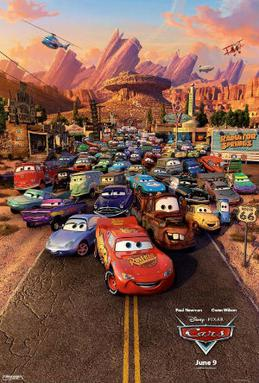


# Group 3: Used Cars Dataset
Team Members:
- Cameron Bell
- Riccardo Valsecchi
- Israel Kollie
- Sosina Tefera

We are using the Cars dataset

# 1. Data Loading & Initial Exploration


In [3]:
path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'

## Load necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
import shap
import math
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [200]:
# Load Dataset
df = pd.read_csv(path + 'Cars_rdm.csv')
df

,Country,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW,Horse,Order
0,NL,oldtimer,harley davidson,8900,42570,Manual,1/2/02,Gasoline,49,67,0.000002
1,I,lancia,ypsilon,2300,270000,Manual,1/11/07,Diesel,55,75,0.000003
2,B,reliant,rialto,850,10000,0 Transmision,1/10/81,Gasoline,29,39,0.000005
3,E,opel,corsa,16809,22523,Automatico,1/1/23,Gasoline,96,131,0.000006
4,E,nissan,micra,11550,59926,Manual,1/5/21,Gasoline,68,92,0.000007
...,...,...,...,...,...,...,...,...,...,...,...
99995,B,ferrari,portofino,214500,31650,Semiautomatico,1/7/18,Gasoline,441,600,0.115948
99996,B,fiat,500e,23399,49000,Automatico,1/1/22,Electrico,87,118,0.115949
99997,F,peugeot,208,12680,66205,Manual,1/12/18,Diesel,74,101,0.115949
99998,A,mercedes-benz,e 200,39990,23000,Automatico,1/5/22,Diesel,118,160,0.115950


## Display basic information

In [4]:
# Display Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           100000 non-null  object 
 1   Manufacturer      100000 non-null  object 
 2   Model             100000 non-null  object 
 3   Price             100000 non-null  int64  
 4   Km                100000 non-null  int64  
 5   Automatic_Manual  100000 non-null  object 
 6   Year              100000 non-null  object 
 7   Fuel              100000 non-null  object 
 8   kW                100000 non-null  int64  
 9   Horse             100000 non-null  int64  
 10  Order             100000 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 8.4+ MB


In [5]:
# Statistical summary for numerical columns - Display descriptive statistics of the DataFrame 'df
# Provides a summary of the central tendency, dispersion, and range of the data
df.describe()

,Price,Km,kW,Horse,Order
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,2.744641e+04,9.777306e+04,120.817420,164.336380,0.057809
std,5.889952e+04,9.725197e+04,83.701852,113.781864,0.033482
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000002
25%,8.900000e+03,2.701150e+04,74.000000,101.000000,0.028631
50%,1.695600e+04,8.270950e+04,100.000000,136.000000,0.057811
75%,2.895000e+04,1.485180e+05,135.000000,184.000000,0.086796
max,4.400000e+06,9.999999e+06,2002.000000,2722.000000,0.115952


In [6]:
# Check the first few rows
df.head()

,Country,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW,Horse,Order
0,NL,oldtimer,harley davidson,8900,42570,Manual,1/2/02,Gasoline,49,67,0.000002
1,I,lancia,ypsilon,2300,270000,Manual,1/11/07,Diesel,55,75,0.000003
2,B,reliant,rialto,850,10000,0 Transmision,1/10/81,Gasoline,29,39,0.000005
3,E,opel,corsa,16809,22523,Automatico,1/1/23,Gasoline,96,131,0.000006
4,E,nissan,micra,11550,59926,Manual,1/5/21,Gasoline,68,92,0.000007


## Check for missing values and duplicates

In [7]:
# Check missing values
df.isna().sum()

,0
Country,0
Manufacturer,0
Model,0
Price,0
Km,0
Automatic_Manual,0
Year,0
Fuel,0
kW,0
Horse,0


In [8]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

## **Understand the data structure:** Identify numerical vs. categorical features

In [203]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['Price', 'Km', 'kW', 'Horse', 'Order']
Categorical Columns: ['Country', 'Manufacturer', 'Model', 'Automatic_Manual', 'Year', 'Fuel']


In [204]:
# Count unique values in categorical columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Country: 8 unique values
Manufacturer: 182 unique values
Model: 2024 unique values
Automatic_Manual: 4 unique values
Year: 871 unique values
Fuel: 11 unique values


# 2. Data Cleaning & Preprocessing

## Detect and Remove Outliers Using IQR

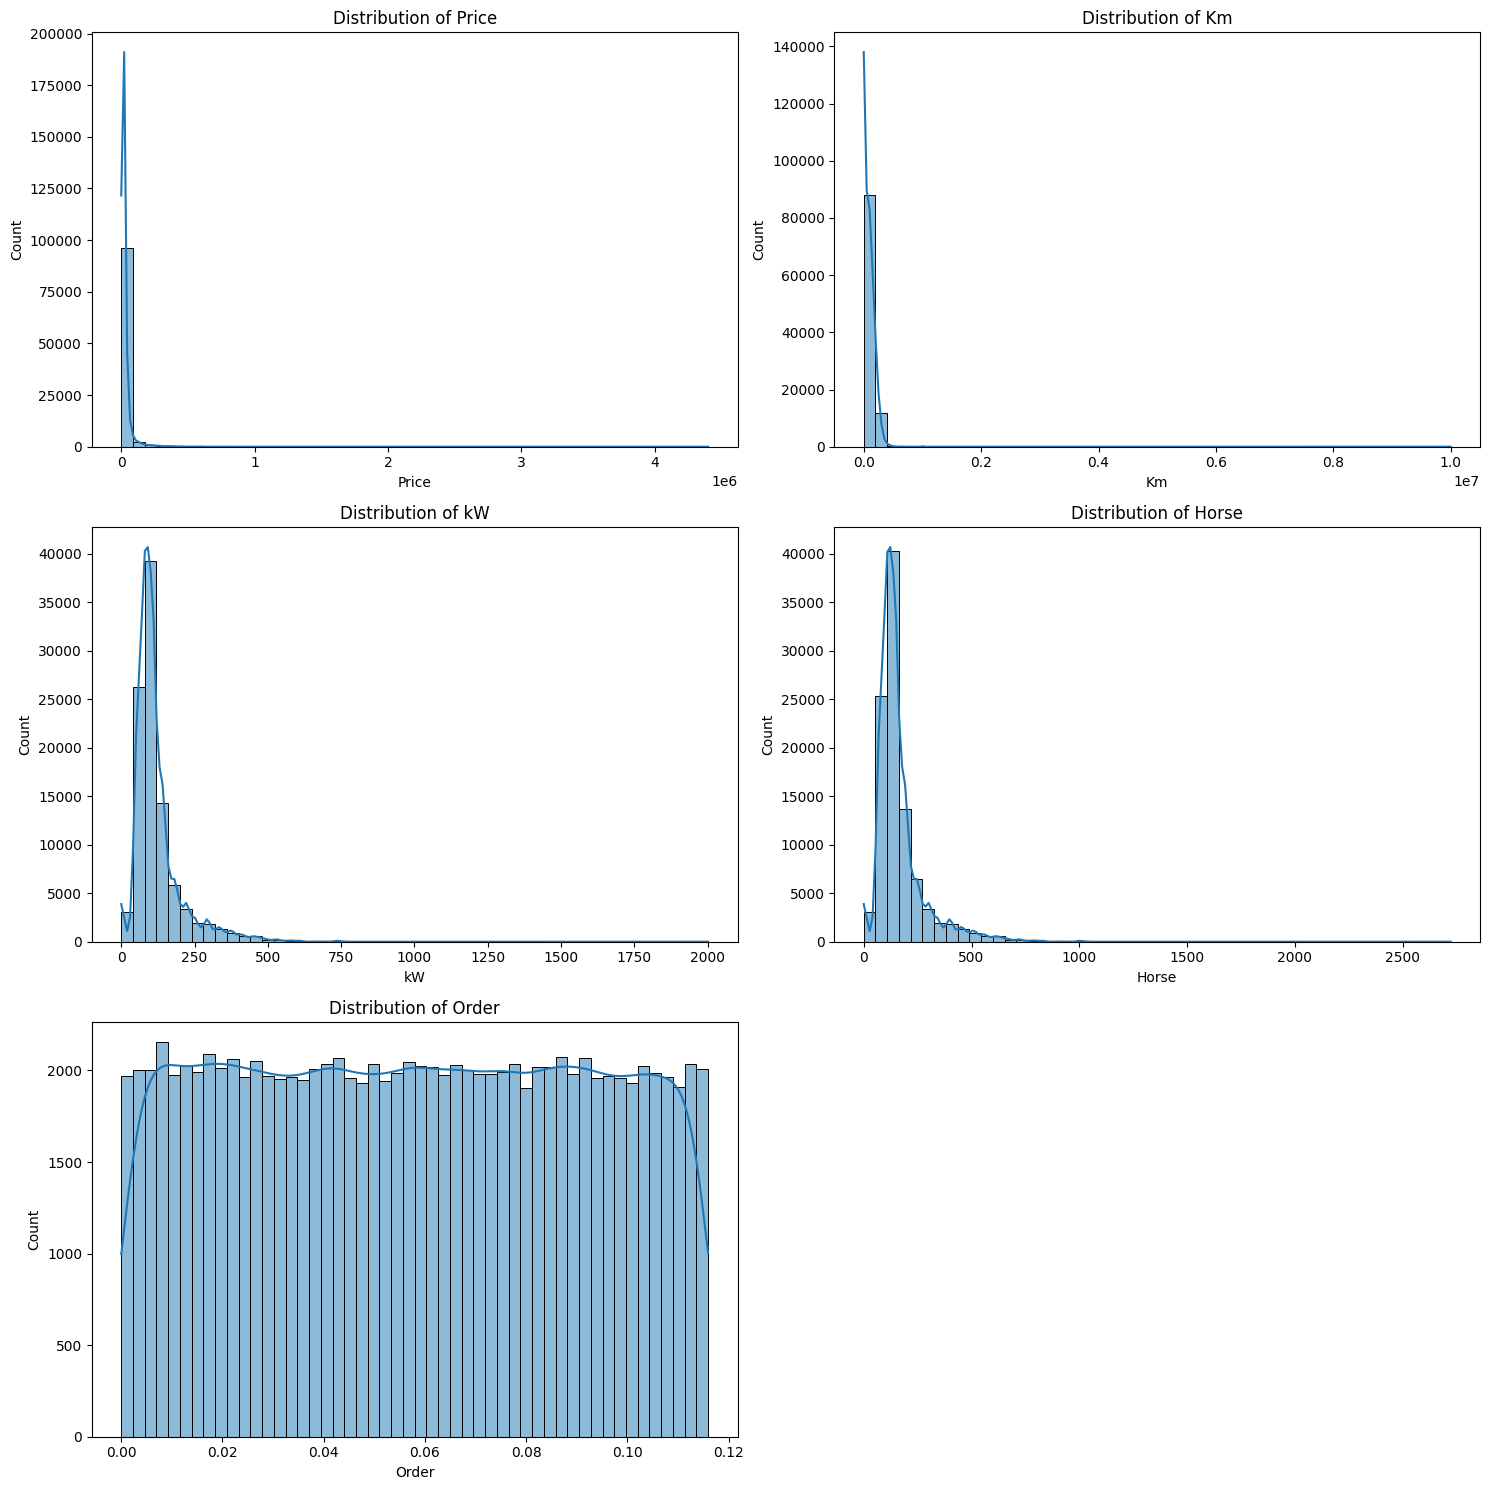

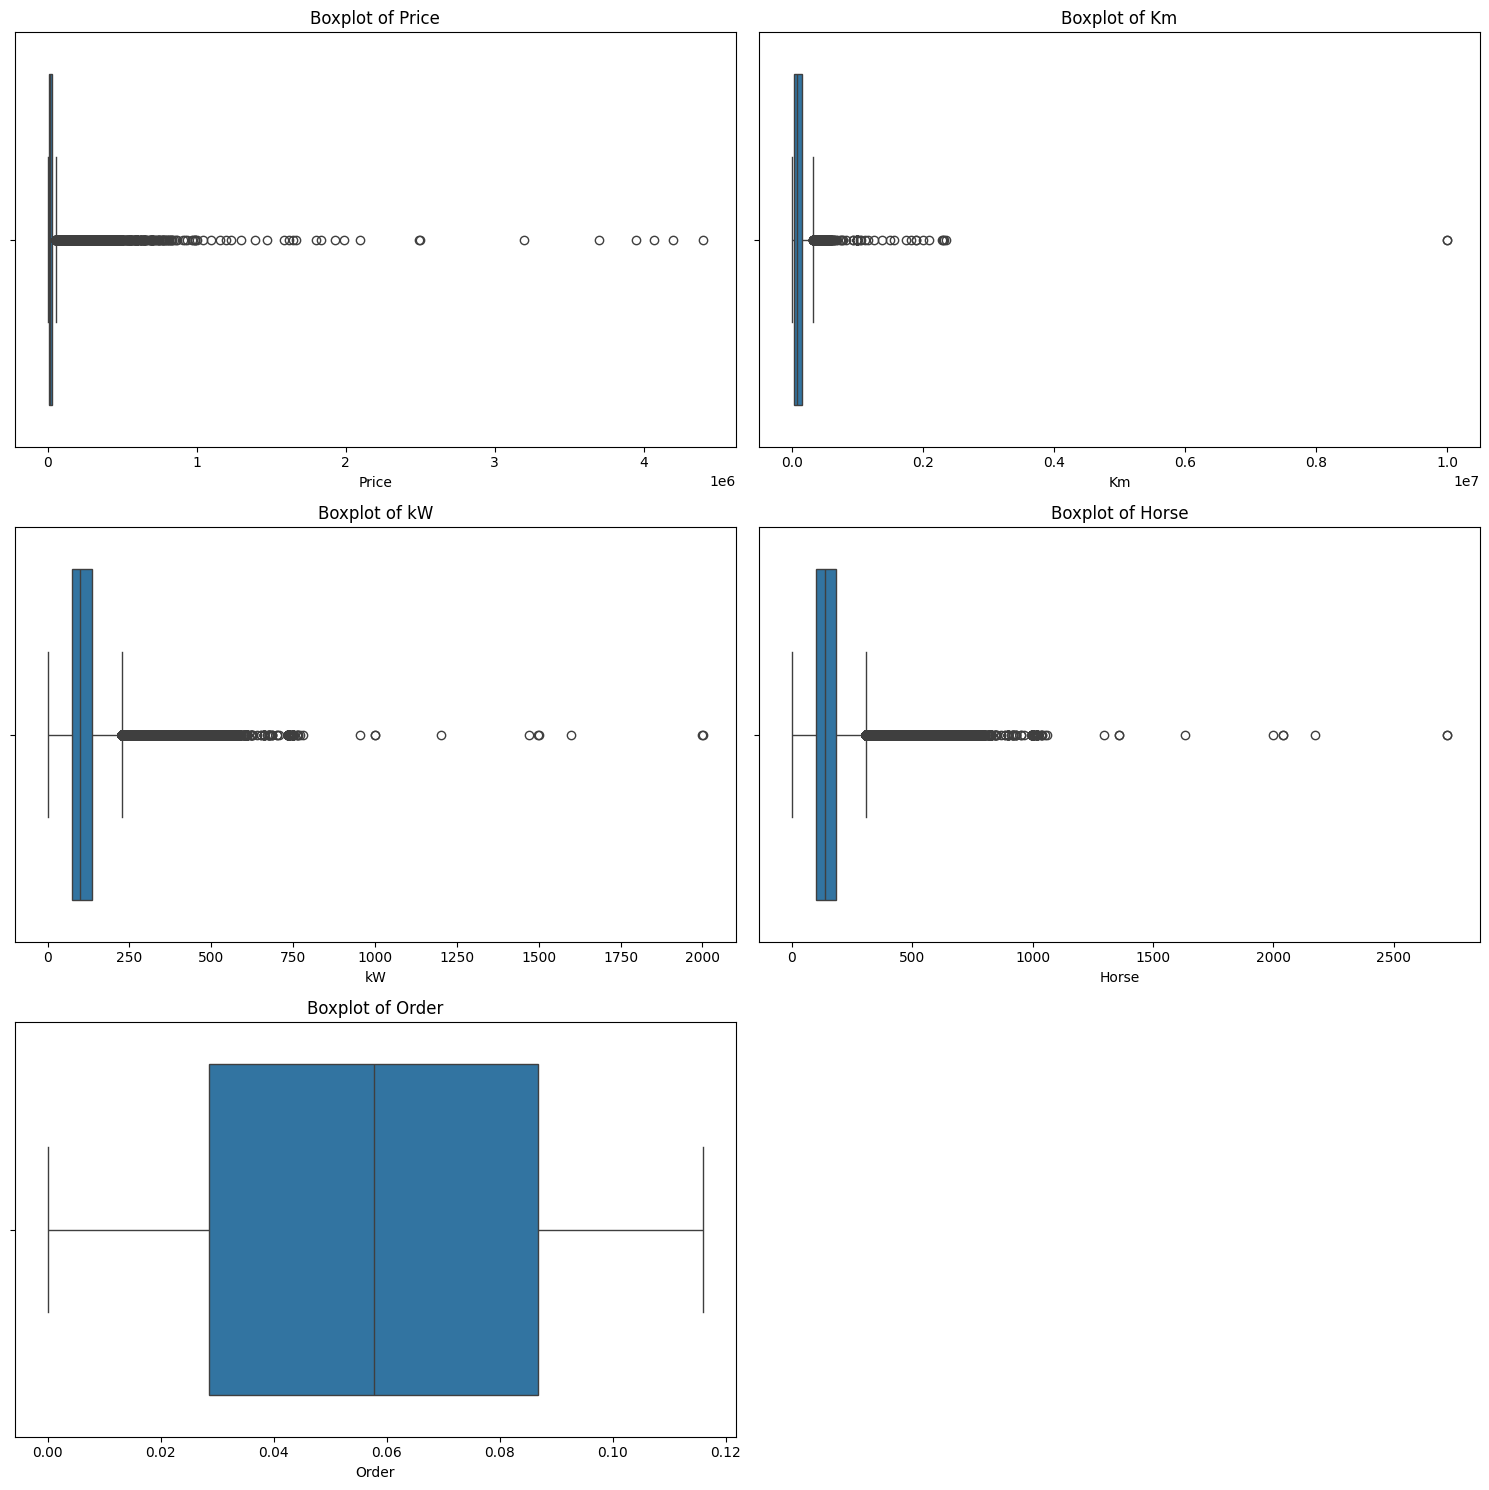

In [205]:
# iterating through the numerical columns of the dataset,
# generating histogram plots with Kernel Density Estimation (KDE) to analyze their
# distributions, as exemplified by the price distribution, which provides insights
# into the spread and central tendencies of the data.

def plot_histograms(df, numerical_cols):
    """
    Plots histograms with KDE for numerical columns in a structured subplot format.
    Automatically adjusts the grid layout based on the number of features.
    """
    num_features = len(numerical_cols)
    rows = math.ceil(num_features / 2)  # Dynamic row calculation

    plt.figure(figsize=(15, 5 * rows))  # Adjust figure size dynamically
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(rows, 2, i)  # Creates a grid layout
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, numerical_cols):
    """
    Plots boxplots for numerical columns in a structured subplot format.
    Helps visualize outliers effectively.
    """
    num_features = len(numerical_cols)
    rows = math.ceil(num_features / 2)

    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# List of numerical columns
numerical_cols = ["Price", "Km", "kW", "Horse", "Order"]  # Adjust based on dataset

# Call functions
plot_histograms(df, numerical_cols)
plot_boxplots(df, numerical_cols)


In [206]:
# removing outliers using the interquartile range (IQR) method, replacing
# them with the column's median, and then apply the function to all
# numerical columns in the dataset.

# Use IQR because the distribution is skewed
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    df[column].fillna(df[column].median(), inplace=True)
    return df

for col in numerical_cols:
    remove_outliers(df, col)

## Boxplots after outliers removed

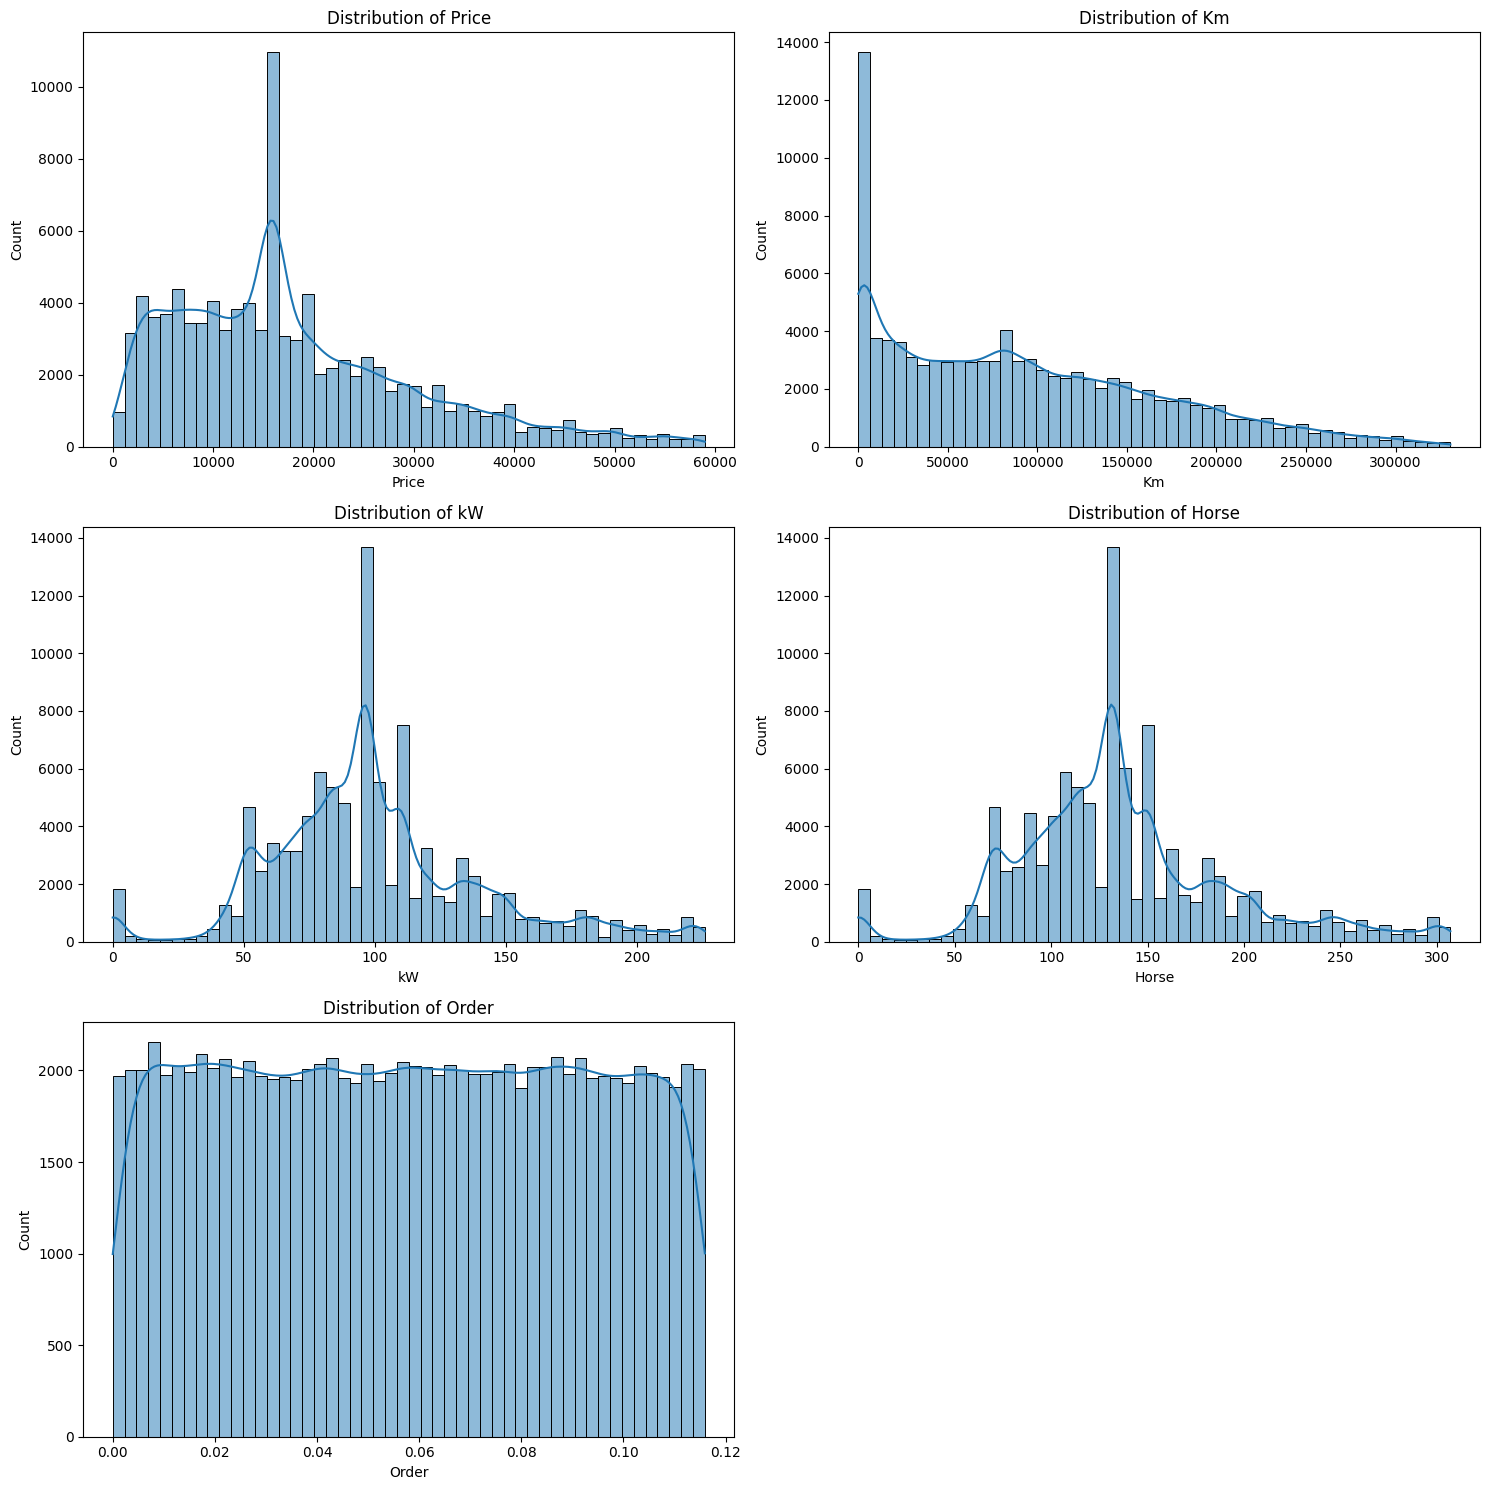

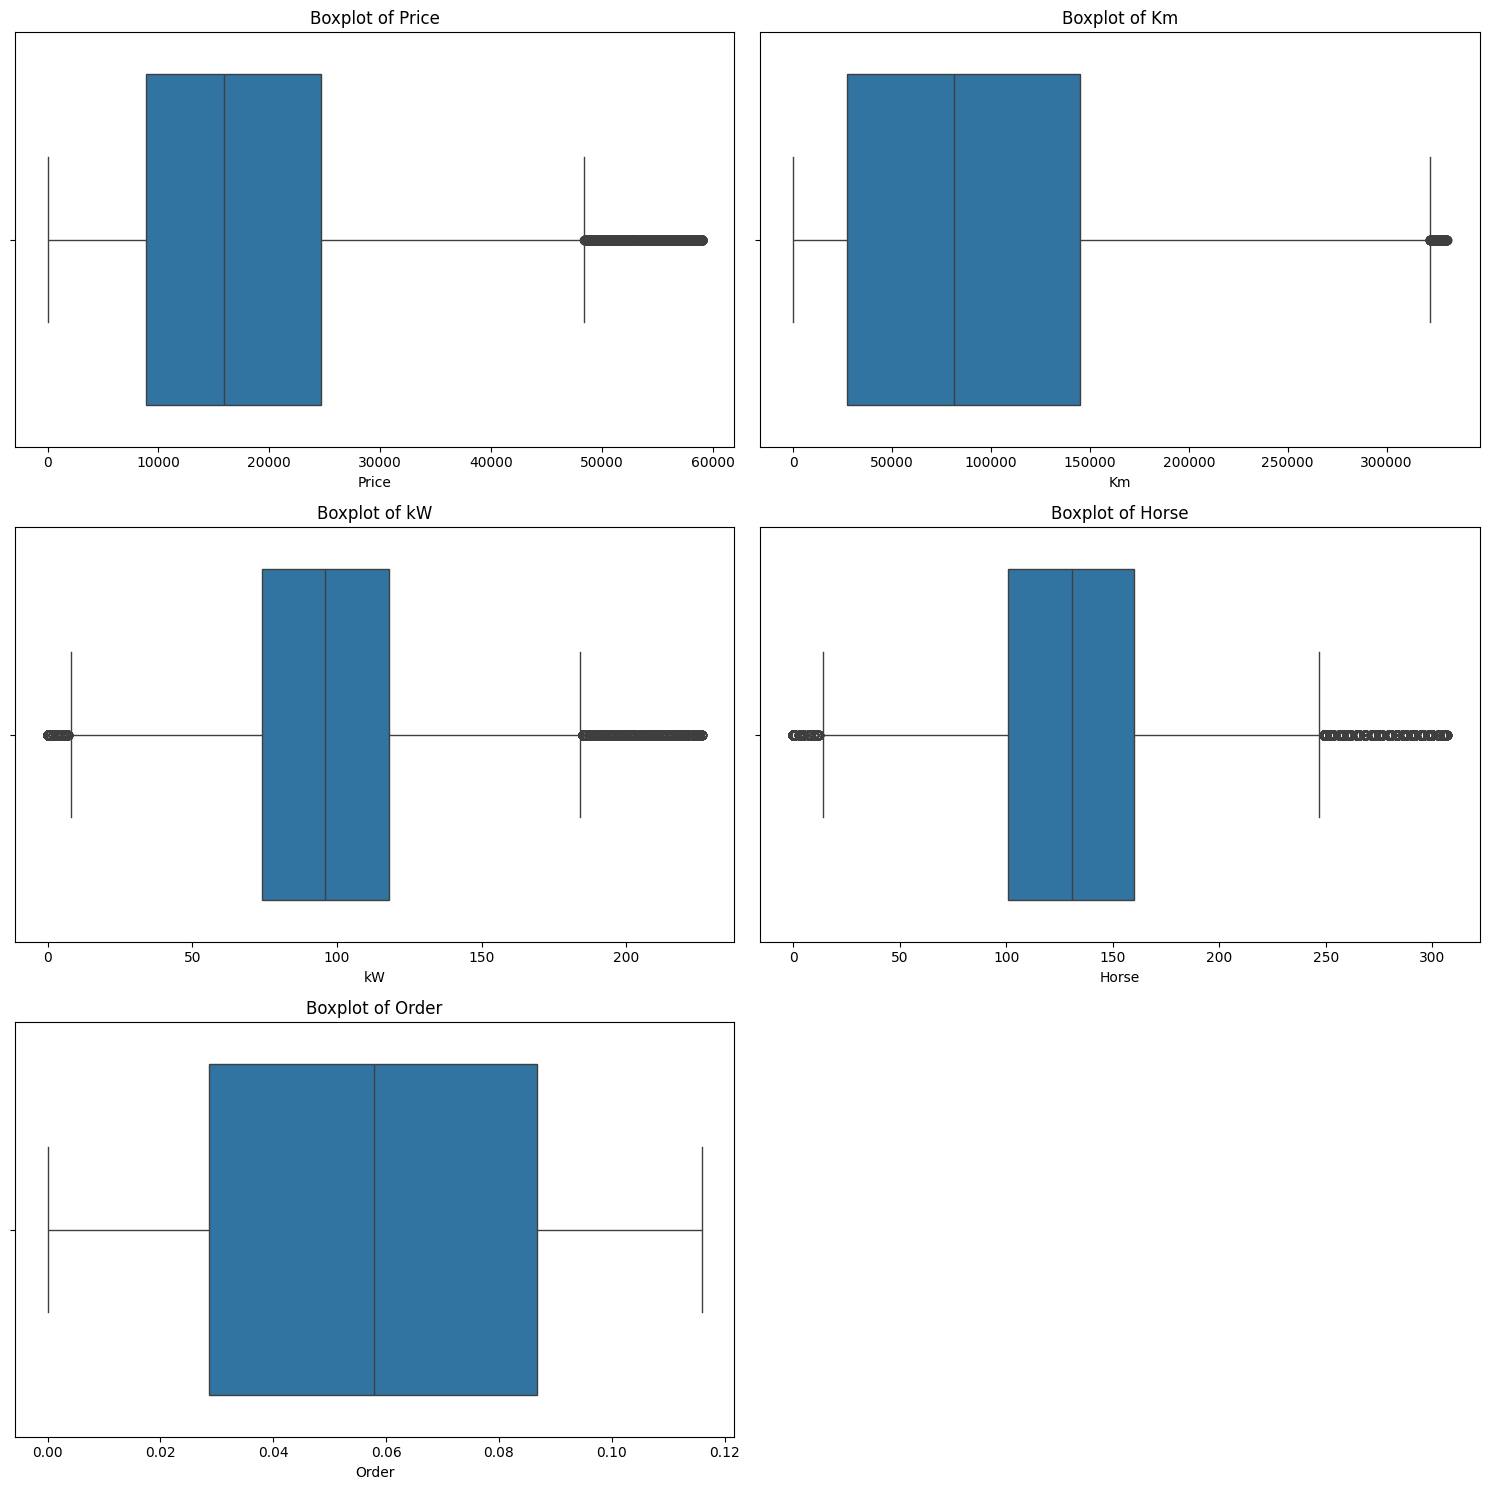

In [207]:
# Call functions
plot_histograms(df, numerical_cols)
plot_boxplots(df, numerical_cols)

## Removing Columns

We need to change "Year" column values to display only the year without month and day.
Also, "Order" table is not making a point, so we drop it.

In [208]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year

# Drop the Order column as it does not impact price
df = df.drop('Order', axis=1)

Then, 'Horse' and 'kW' are the same exact measure for power, with this relationship: horse = kW * 1.333, so we drop 'Horse'

In [209]:
# Drop Horsepower since it's redundant with kW
df.drop(columns=["Horse"], inplace=True)

Then, the categorical and numerical columns become:

In [210]:
numerical_cols = ['Price', 'Km', 'kW', 'Year']
categorical_cols = ['Country', 'Manufacturer', 'Model', 'Automatic_Manual', 'Fuel']

In [211]:
#Let's have a look at the file now:
df.head()

,Country,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW
0,NL,oldtimer,harley davidson,8900.0,42570.0,Manual,2002,Gasoline,49.0
1,I,lancia,ypsilon,2300.0,270000.0,Manual,2007,Diesel,55.0
2,B,reliant,rialto,850.0,10000.0,0 Transmision,1981,Gasoline,29.0
3,E,opel,corsa,16809.0,22523.0,Automatico,2023,Gasoline,96.0
4,E,nissan,micra,11550.0,59926.0,Manual,2021,Gasoline,68.0


# 3. Exploratory Data Analysis (EDA)


## Summary statistics & distribution analysis

## Bar charts for categorical variables

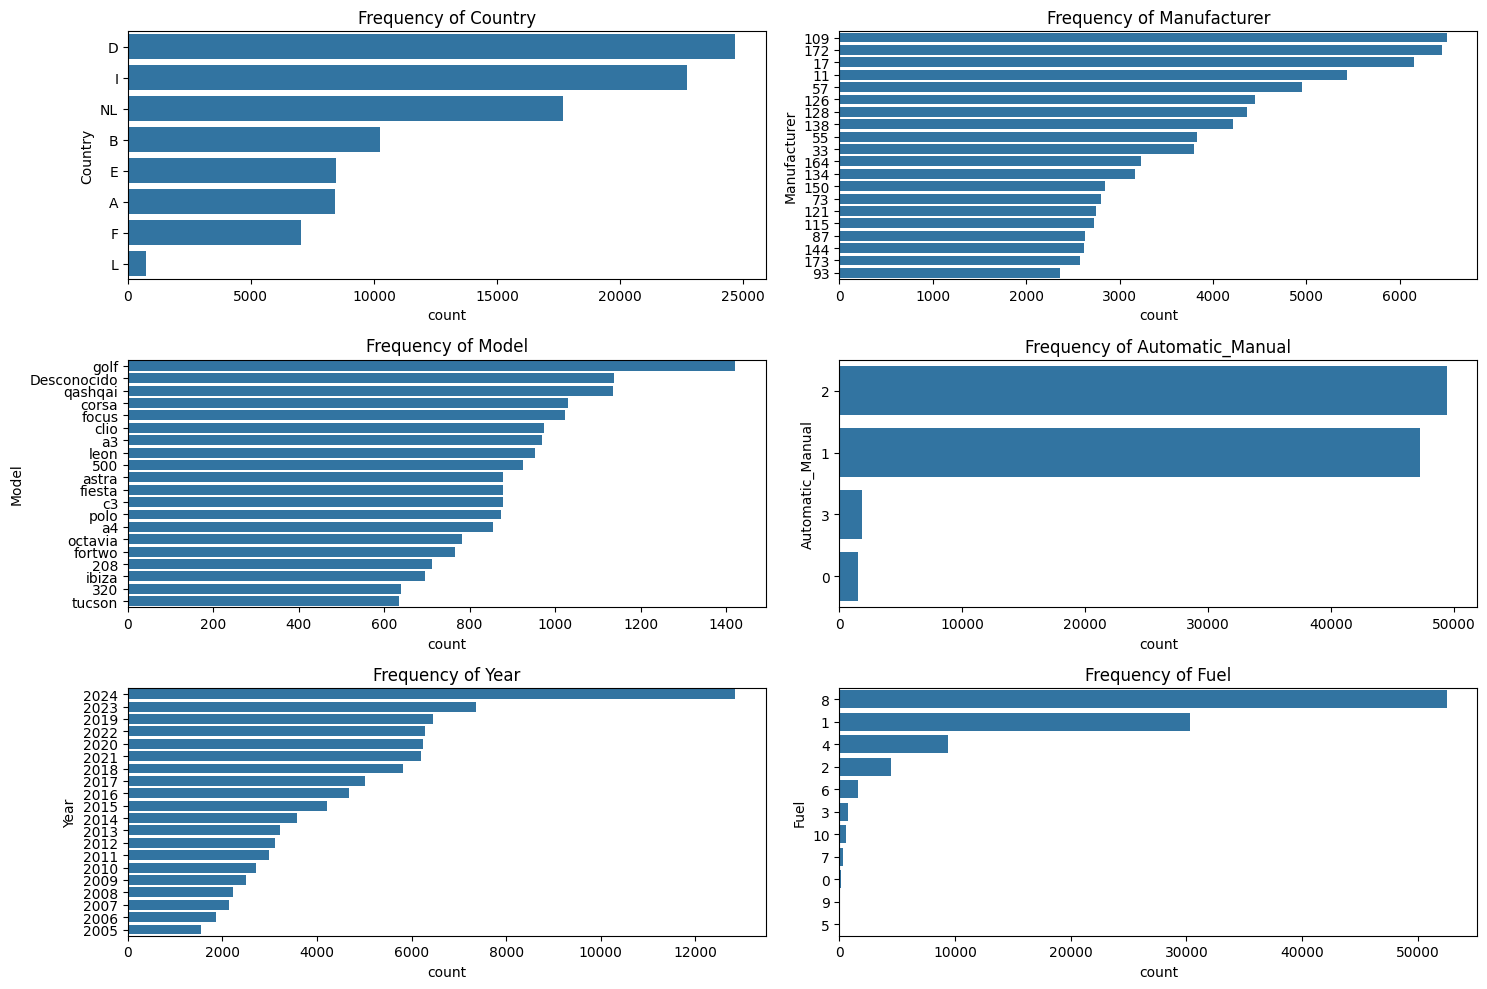

In [263]:
# List of categorical columns
categorical_cols = ["Country", "Manufacturer", "Model", "Automatic_Manual", "Year", "Fuel"]

# Bar plots for categorical variables (showing top 20 for better visibility)
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])  # Top 20 categories
    plt.title(f"Frequency of {col}")
plt.tight_layout()
plt.show()


Showing again but for better visibility

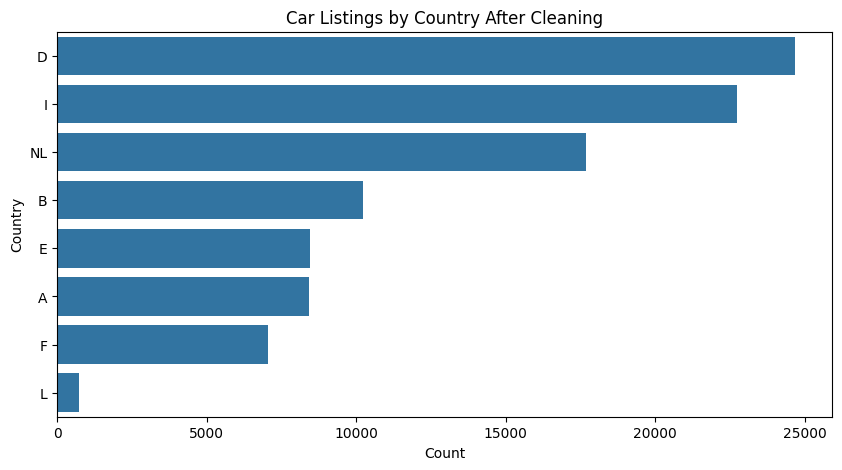

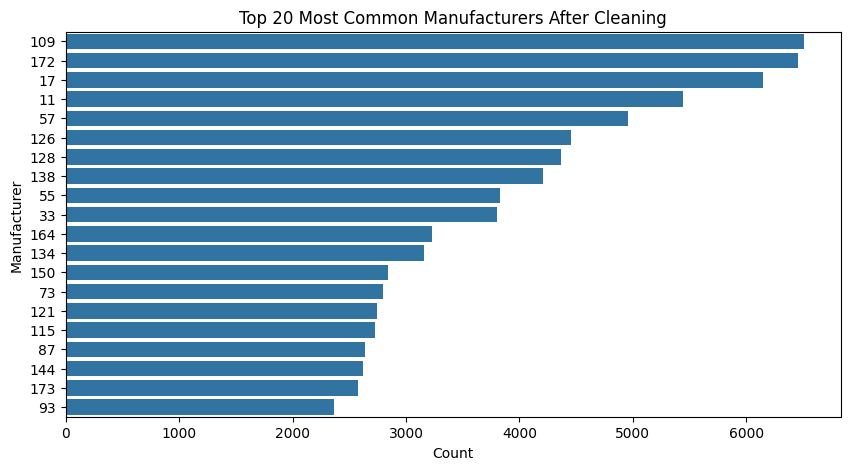

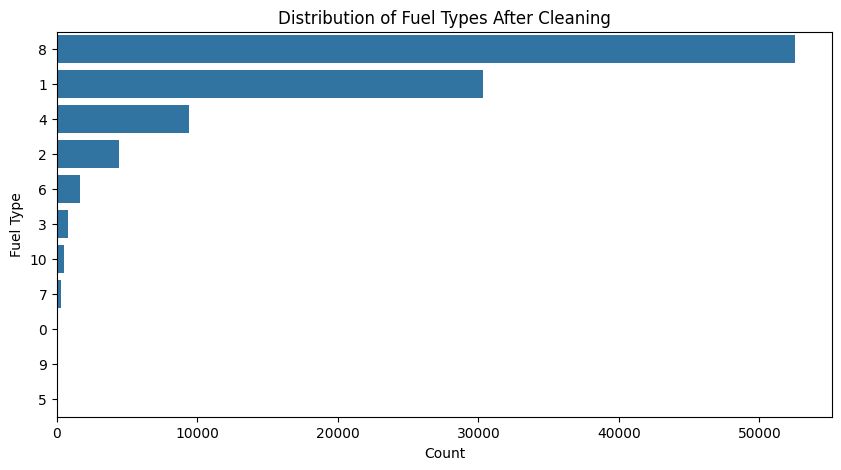

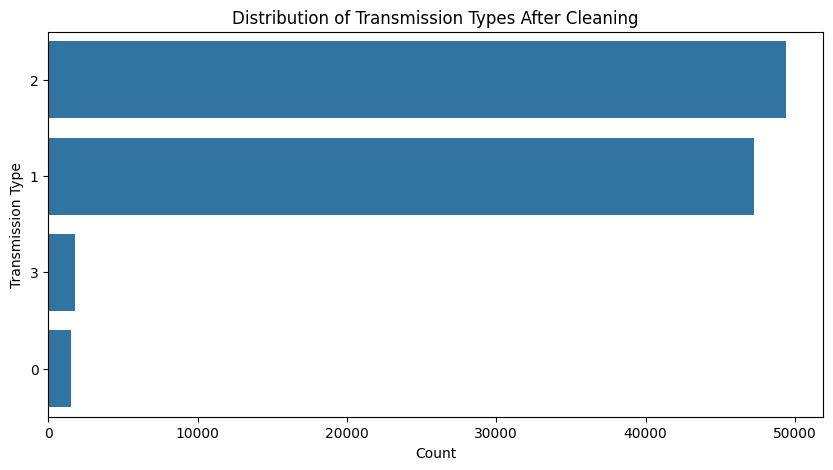

In [264]:
# Country Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().index)
plt.title("Car Listings by Country After Cleaning")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Manufacturer Distribution (Top 20)
plt.figure(figsize=(10,5))
sns.countplot(y=df["Manufacturer"], order=df["Manufacturer"].value_counts().index[:20])
plt.title("Top 20 Most Common Manufacturers After Cleaning")
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.show()

# Fuel Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df["Fuel"], order=df["Fuel"].value_counts().index)
plt.title("Distribution of Fuel Types After Cleaning")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()

# Transmission Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df["Automatic_Manual"], order=df["Automatic_Manual"].value_counts().index)
plt.title("Distribution of Transmission Types After Cleaning")
plt.xlabel("Count")
plt.ylabel("Transmission Type")
plt.show()

## Histograms for numeric variables

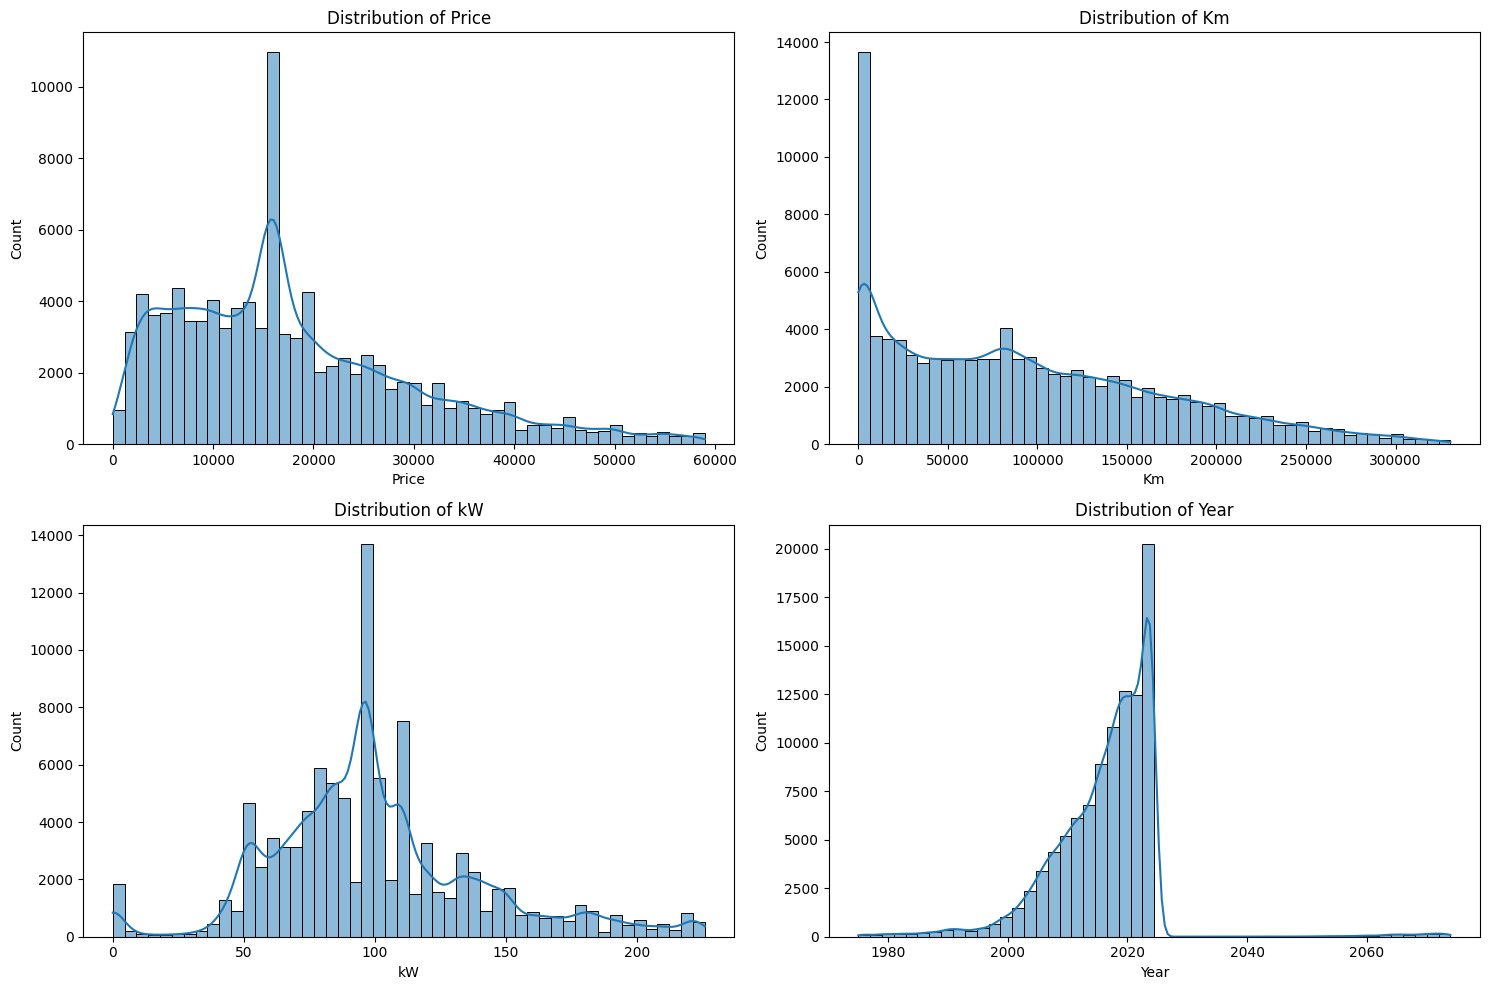

In [265]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Boxplots

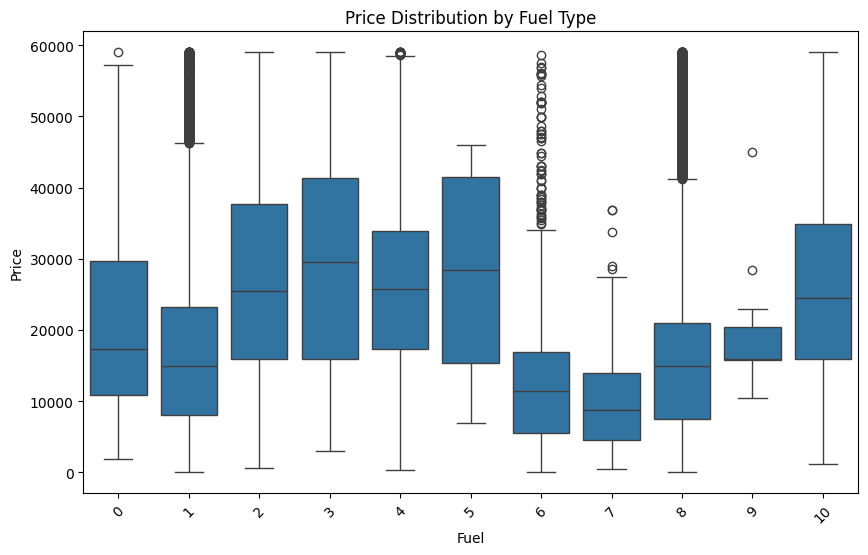

In [266]:
#Boxplot: Price by Fuel Type
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel"], y=df["Price"])
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()

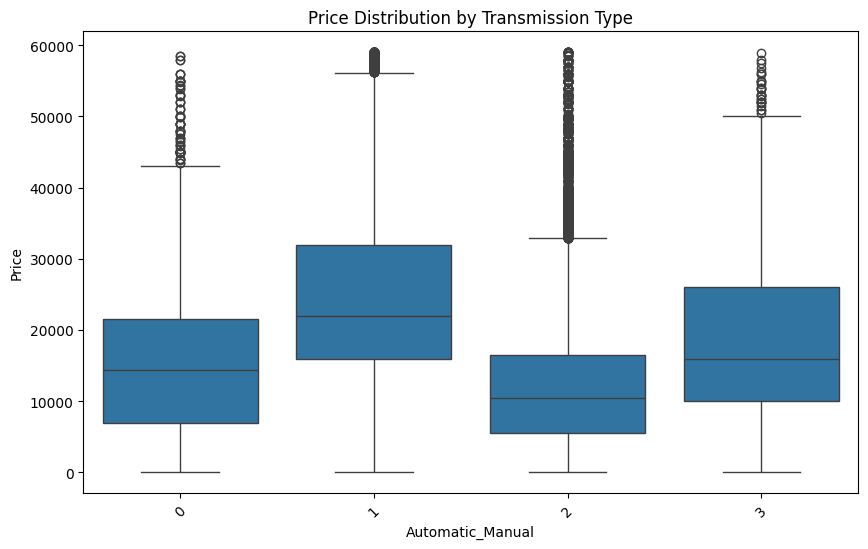

In [267]:
#Boxplot: Price by Transmission Type
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Automatic_Manual"], y=df["Price"])
plt.title("Price Distribution by Transmission Type")
plt.xticks(rotation=45)
plt.show()

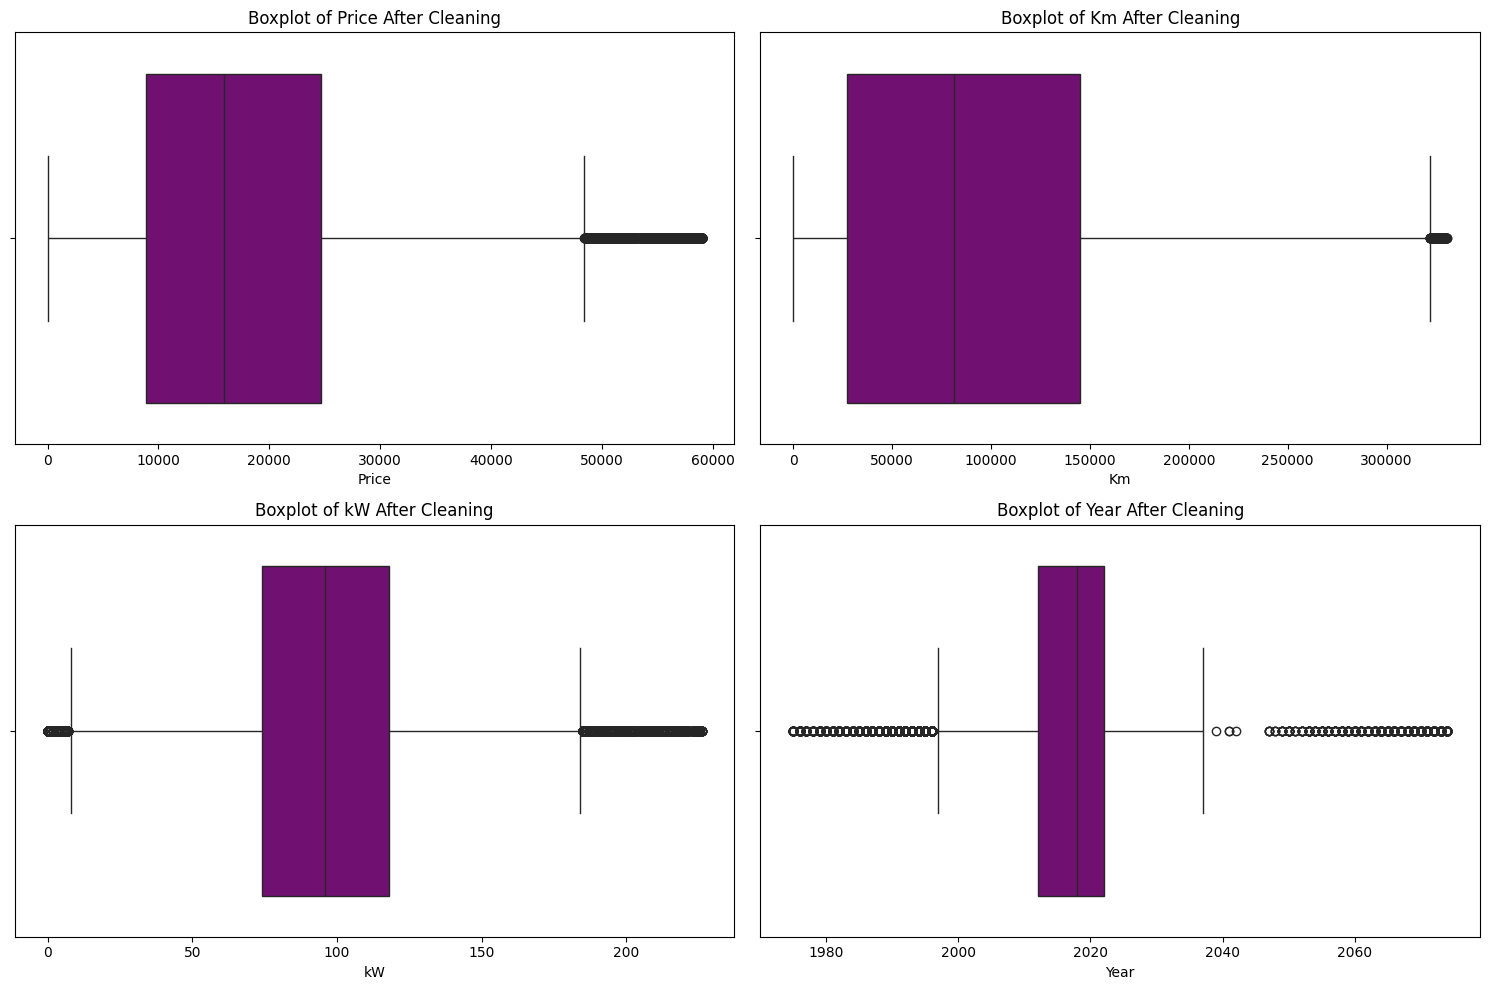

In [268]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="purple")
    plt.title(f"Boxplot of {col} After Cleaning")
plt.tight_layout()
plt.show()

##Correlation Heatmap

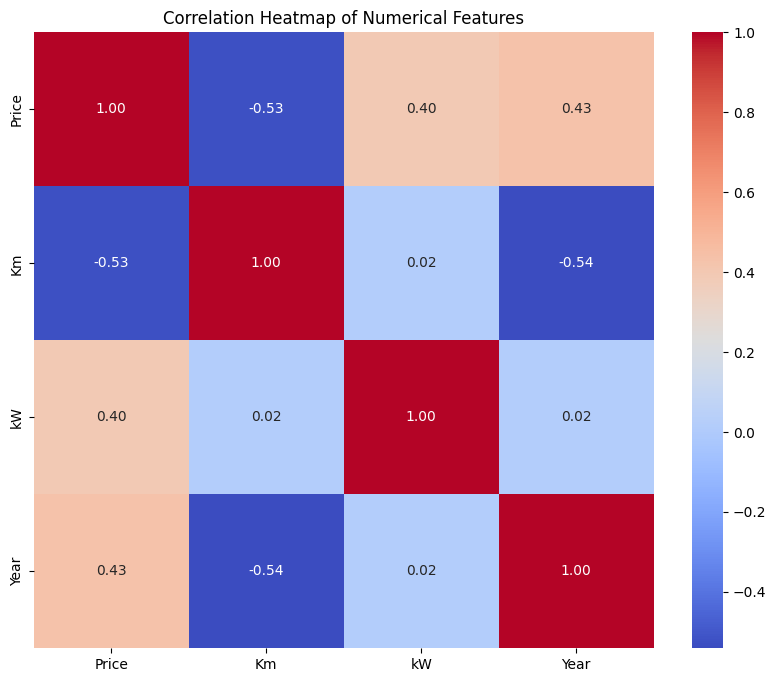

In [269]:
# calculating the correlation matrix for selected numerical features and
# visualizeing it using a heatmap, where the intensity of colors represents the
# strength and direction of correlations. In the heatmap, negative values
#  (e.g., -0.54 between Price and Km) indicate inverse relationships,
#  while positive values (e.g., 0.97 between kW and Horsepower) suggest
#  strong direct correlations, helping to identify key patterns in the dataset


# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Group-By Analysis

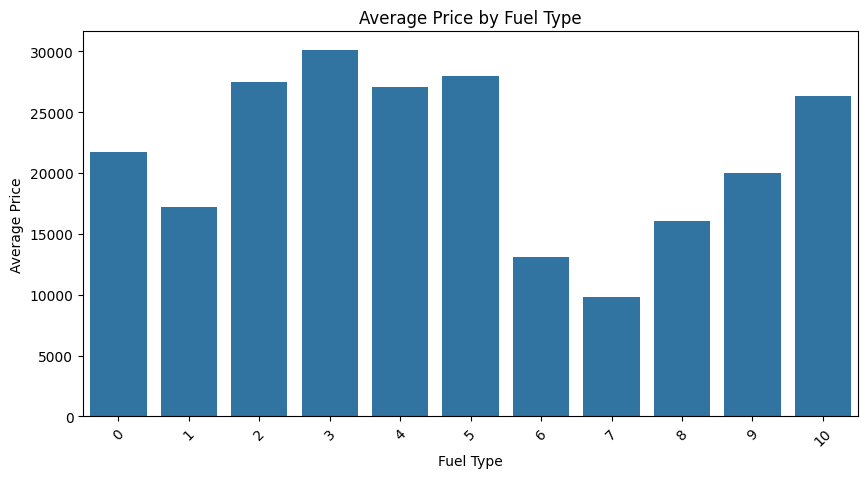

In [270]:
#Group-By Analysis: Average Price by $Fuel Type
fuel_price = df.groupby("Fuel")["Price"].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=fuel_price.index, y=fuel_price.values)
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

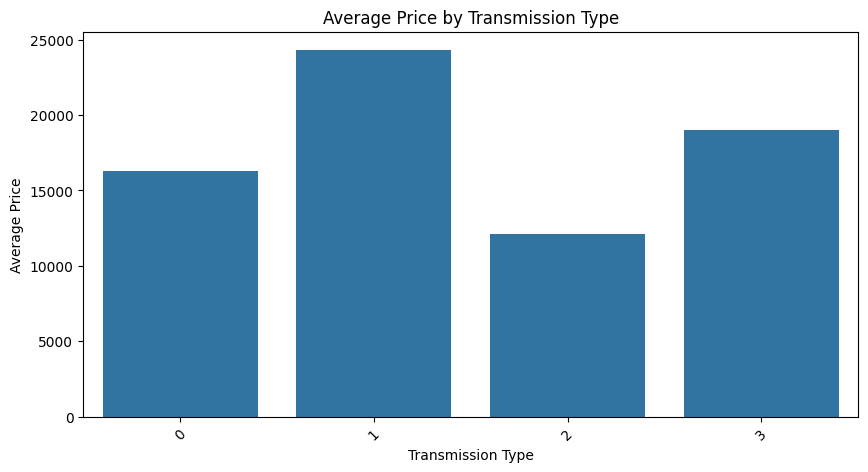

In [271]:
#Group-By Analysis: Average Price by Transmission Type
trans_price = df.groupby("Automatic_Manual")["Price"].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=trans_price.index, y=trans_price.values)
plt.title("Average Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

## Scatterplots

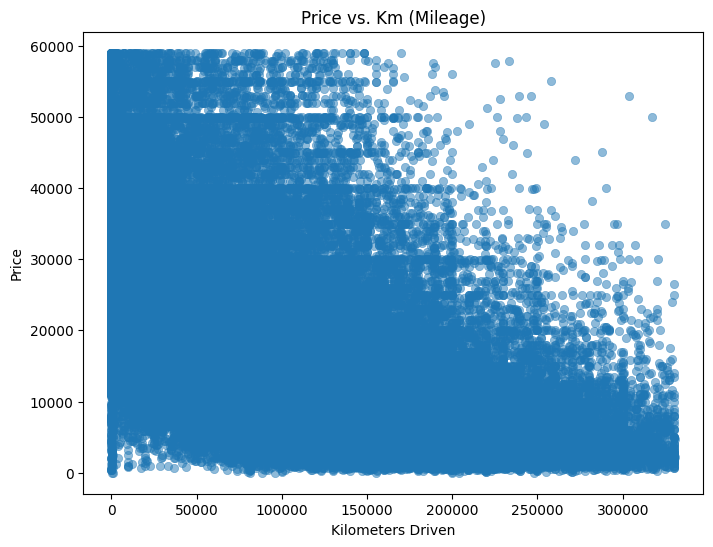

In [272]:
#Scatter Plot: Price vs. Km
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Km"], y=df["Price"], alpha=0.5, edgecolor=None)
plt.title("Price vs. Km (Mileage)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()

In [ ]:
# --- Individual Scatterplots ---
# Example: Scatter plot between two features (e.g., 'Price' vs. 'Km')
if 'Price' in df.columns and 'Km' in df.columns:
   plt.figure(figsize=(8, 5))
   sns.scatterplot(x=df['Km'], y=df['Price'], alpha=0.5)
   plt.title("Price vs. Km")
   plt.xlabel("Kilometers")
   plt.ylabel("Price")
   plt.show()

In [ ]:
#Scatter Plot: Price vs. Year
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Year"], y=df["Price"], alpha=0.5, edgecolor=None)
plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [ ]:
# Create a copy to avoid modifying the original dataframe
df_sampled = df.copy()

# Extract valid 4-digit years
df_sampled["Year"] = df_sampled["Year"].astype(str).str.extract(r'(\d{4})')

# Convert to integer while handling missing values
df_sampled["Year"] = pd.to_numeric(df_sampled["Year"], errors='coerce')

# Drop rows with missing values in Year
df_sampled = df_sampled.dropna(subset=["Year"])

# Convert to integer type after dropping NaNs
df_sampled["Year"] = df_sampled["Year"].astype(int)

# Filter out invalid years (assuming range 1900 - 2025)
df_sampled = df_sampled[(df_sampled["Year"] >= 1900) & (df_sampled["Year"] <= 2025)]

# Sort by Year for better visualization
df_sampled = df_sampled.sort_values(by="Year")

# Sample data to reduce noise and improve performance
df_sampled = df_sampled.sample(5000, random_state=42) if len(df_sampled) > 5000 else df_sampled

# Plot Price vs. Year After Cleaning
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sampled["Year"], y=df_sampled["Price"], alpha=0.5)

# Set x-axis ticks dynamically (every 5 years), ensuring integer values
min_year = int(df_sampled["Year"].min())
max_year = int(df_sampled["Year"].max())

plt.xticks(range(min_year, min(2025, max_year + 1), 5), rotation=45, ha='right')

plt.title("Price vs. Year After Cleaning")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [ ]:
# Subsample for clarity
df_sampled = df.sample(5000, random_state=42)

# Price vs. Km (Mileage)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_sampled["Km"], y=df_sampled["Price"], alpha=0.3)
plt.title("Price vs. Km (Mileage) After Cleaning")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()

## Pairplot or scatterplots for feature interactions

In [ ]:
# generating a pair plot using Kernel Density Estimation (KDE) for diagonal
# elements, to visualize the relationships and distributions of numerical features

sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

### Pairplot (for a subset of numeric columns)

In [ ]:
# --- Pairplot (for a subset of numeric columns) ---
# Feel free to limit to key columns to avoid clutter
cols_for_pairplot = list(numerical_cols[:4])  # example: first 4 numeric columns
sns.pairplot(df[cols_for_pairplot], corner=True, diag_kind='kde')
plt.suptitle("Pairplot for Selected Numeric Features", y=1.02)
plt.show()

In [ ]:
#Pair Plot to Identify Trends
sns.pairplot(df[["Price", "Km", "kW"]])
plt.show()

## Anamoly Detection

In [ ]:
# 1. Select relevant numeric features for anomaly detection
features_for_anomaly = list(numerical_cols[:4])  # Choose whichever numeric columns you prefer
X = df[features_for_anomaly].dropna()

# 2. Fit IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X)

# 3. Predict anomalies
anomaly_scores = iso_forest.decision_function(X)
anomaly_labels = iso_forest.predict(X)

# 4. Visualize: We'll plot one scatter with anomalies highlighted
# Example: Plot first 2 columns in features_for_anomaly
plt.figure(figsize=(8, 5))
plt.scatter(X[features_for_anomaly[0]], X[features_for_anomaly[1]],
            c=anomaly_labels, cmap='coolwarm', alpha=0.7)
plt.title(f"Anomaly Detection ({features_for_anomaly[0]} vs. {features_for_anomaly[1]})")
plt.xlabel(features_for_anomaly[0])
plt.ylabel(features_for_anomaly[1])
plt.colorbar(label='Anomaly Label')  # -1 = anomaly, 1 = normal
plt.show()

# 4. Feature Selection & Dimensionality Reduction

## Convert Categorical Variables into Numerical Representations

### One-Hot and Label Enocding
Want to see which impacts the model performance the most

In [184]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create a copy of the DataFrame for one-hot encoding
df_onehot = df.copy()

# Create a copy of the DataFrame for label encoding
df_label = df.copy()

# One-hot encoding for 'Automatic_Manual'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
automatic_manual_encoded = onehot_encoder.fit_transform(df_onehot[['Automatic_Manual']])

# Retrieve correct column names for one-hot encoding
onehot_columns = onehot_encoder.get_feature_names_out(['Automatic_Manual'])

# Convert to DataFrame
automatic_manual_encoded_df = pd.DataFrame(automatic_manual_encoded, columns=onehot_columns, index=df_onehot.index)

# Concatenate with original DataFrame and drop original column
df_onehot = pd.concat([df_onehot, automatic_manual_encoded_df], axis=1).drop('Automatic_Manual', axis=1)

# Label encoding for 'Automatic_Manual'
label_encoder = LabelEncoder()
df_label['Automatic_Manual'] = label_encoder.fit_transform(df_label['Automatic_Manual'])

# Display the tables for both
print("DataFrame with One-Hot Encoded 'Automatic_Manual':")
print(df_onehot.head())

print("\nDataFrame with Label Encoded 'Automatic_Manual':")
print(df_label.head())


DataFrame with One-Hot Encoded 'Automatic_Manual':
  Country Manufacturer            Model    Price        Km  Year      Fuel  \
0      NL     oldtimer  harley davidson   8900.0   42570.0  2002  Gasoline   
1       I       lancia          ypsilon   2300.0  270000.0  2007    Diesel   
2       B      reliant           rialto    850.0   10000.0  1981  Gasoline   
3       E         opel            corsa  16809.0   22523.0  2023  Gasoline   
4       E       nissan            micra  11550.0   59926.0  2021  Gasoline   

     kW  Automatic_Manual_0 Transmision  Automatic_Manual_Automatico  \
0  49.0                             0.0                          0.0   
1  55.0                             0.0                          0.0   
2  29.0                             1.0                          0.0   
3  96.0                             0.0                          1.0   
4  68.0                             0.0                          0.0   

   Automatic_Manual_Manual  Automatic_Manual_Se

In [185]:
print(df_label.groupby('Automatic_Manual')['Automatic_Manual'].count())


Automatic_Manual
0     1538
1    47233
2    49413
3     1816
Name: Automatic_Manual, dtype: int64


so 2 = manual;
1 = automatico; 3 = semi automatico; 4 = 0 transmission


## Further Encoding

Need to complete further encoding:
- One-hot encoded: Fuel
- Label encoded: Fuel, Manufacturer, Model

In [186]:
# One-hot encoding for 'Fuel' in df_onehot
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
fuel_encoded = onehot_encoder.fit_transform(df_onehot[['Fuel']])
onehot_columns = onehot_encoder.get_feature_names_out(['Fuel'])
fuel_encoded_df = pd.DataFrame(fuel_encoded, columns=onehot_columns, index=df_onehot.index)
df_onehot = pd.concat([df_onehot, fuel_encoded_df], axis=1).drop('Fuel', axis=1)


# Label encoding for 'Fuel' in df_label
label_encoder = LabelEncoder()
df_label['Fuel'] = label_encoder.fit_transform(df_label['Fuel'])


# Label encoding for 'Manufacturer' and 'Model' in both dataframes
label_encoder = LabelEncoder()
for col in ['Manufacturer', 'Model']:
  df_onehot[col] = label_encoder.fit_transform(df_onehot[col])
  df_label[col] = label_encoder.fit_transform(df_label[col])


# Display the tables for both
print("DataFrame with One-Hot Encoded 'Automatic_Manual' and 'Fuel':")
print(df_onehot.head())

print("\nDataFrame with Label Encoded 'Automatic_Manual', 'Fuel', 'Manufacturer', and 'Model':")
print(df_label.head())


DataFrame with One-Hot Encoded 'Automatic_Manual' and 'Fuel':
  Country  Manufacturer  Model    Price        Km  Year    kW  \
0      NL           124   1063   8900.0   42570.0  2002  49.0   
1       I            92   2003   2300.0  270000.0  2007  55.0   
2       B           137   1516    850.0   10000.0  1981  29.0   
3       E           126    628  16809.0   22523.0  2023  96.0   
4       E           121   1283  11550.0   59926.0  2021  68.0   

   Automatic_Manual_0 Transmision  Automatic_Manual_Automatico  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             1.0                          0.0   
3                             0.0                          1.0   
4                             0.0                          0.0   

   Automatic_Manual_Manual  ...  Fuel_Diesel  Fuel_Electrico  \
0                      1.0  ...          0.0             0.0   
1                     

Manufacturer
Model

Drop country for both tables: One-hot encoded & label encoded

In [187]:
# Drop 'Country' from both one-hot encoded and label encoded DataFrames
df_onehot = df_onehot.drop('Country', axis=1)
df_label = df_label.drop('Country', axis=1)

# Display the updated DataFrames
print("DataFrame with One-Hot Encoded features (Country dropped):")
print(df_onehot.head())

print("\nDataFrame with Label Encoded features (Country dropped):")
print(df_label.head())

DataFrame with One-Hot Encoded features (Country dropped):
   Manufacturer  Model    Price        Km  Year    kW  \
0           124   1063   8900.0   42570.0  2002  49.0   
1            92   2003   2300.0  270000.0  2007  55.0   
2           137   1516    850.0   10000.0  1981  29.0   
3           126    628  16809.0   22523.0  2023  96.0   
4           121   1283  11550.0   59926.0  2021  68.0   

   Automatic_Manual_0 Transmision  Automatic_Manual_Automatico  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             1.0                          0.0   
3                             0.0                          1.0   
4                             0.0                          0.0   

   Automatic_Manual_Manual  Automatic_Manual_Semiautomatico  ...  Fuel_Diesel  \
0                      1.0                              0.0  ...          0.0   
1                      1.0             

In [188]:
# encoding categorical features in the dataset using either label encoding
# or one-hot encoding, depending on the specified encoding type

def encode_categorical_features(df, categorical_columns, encoding_type='label'):
    if encoding_type == 'label':
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

In [189]:
# Apply Label Encoding or One-Hot Encoding
df = encode_categorical_features(df, categorical_cols, encoding_type='label')
df

,Country,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW
0,7,124,1063,8900.0,42570.0,2,2002,8,49.0
1,5,92,2003,2300.0,270000.0,2,2007,1,55.0
2,1,137,1516,850.0,10000.0,0,1981,8,29.0
3,3,126,628,16809.0,22523.0,1,2023,8,96.0
4,3,121,1283,11550.0,59926.0,2,2021,8,68.0
...,...,...,...,...,...,...,...,...,...
99995,1,54,1427,15890.0,31650.0,3,2018,8,96.0
99996,1,55,156,23399.0,49000.0,1,2022,2,87.0
99997,4,128,58,12680.0,66205.0,2,2018,1,74.0
99998,0,109,743,39990.0,23000.0,1,2022,1,118.0


## Identify Redundant or Highly Correlated Features using a correlation matrix.


In [190]:
df_encoded = df.copy()
df_encoded = encode_categorical_features(df_encoded, categorical_cols, encoding_type='label')

In [191]:
# Let's assume df is your cleaned dataset (numerical + encoded categorical columns).
# We'll look for correlation above a certain threshold (e.g., 0.8)
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print("Highly Correlated Features (threshold > 0.8):", high_corr_features)

# OPTIONAL: You can drop or decide how to handle these features
# df.drop(high_corr_features, axis=1, inplace=True)

Highly Correlated Features (threshold > 0.8): []


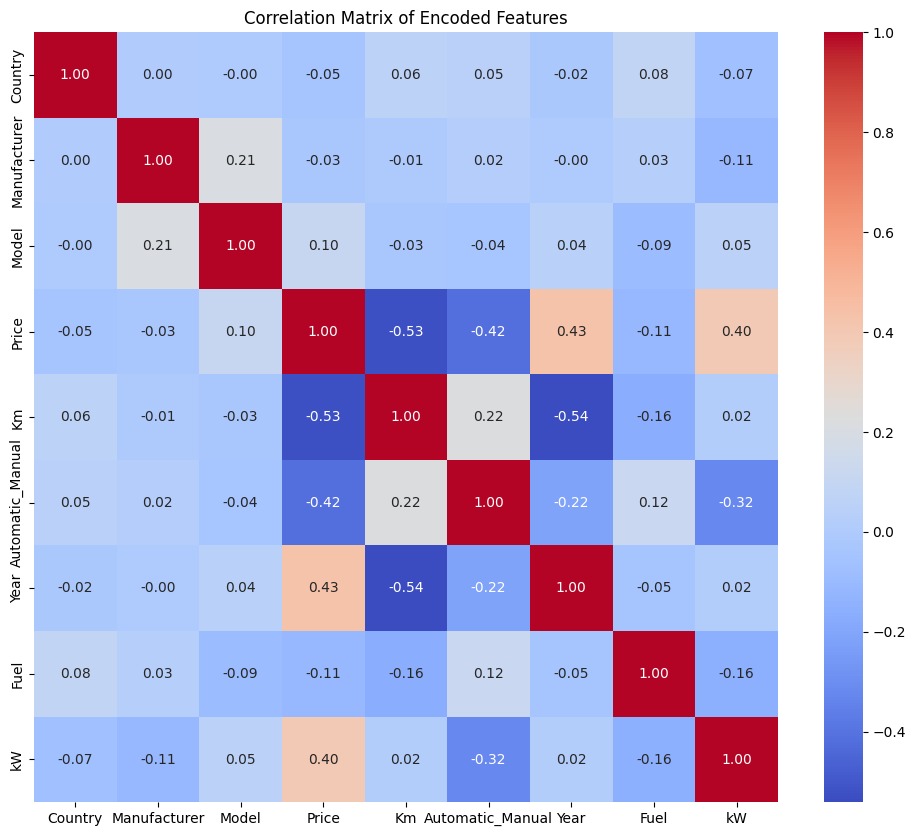

In [192]:
# encoding categorical variables using label encoding and then recalculating
# the correlation matrix, visualizing it through a heatmap.
# The heatmap now includes both numerical and encoded categorical features,
# revealing relationships between different attributes,
# where stronger positive and negative correlations are highlighted,
# aiding in feature selection and data understanding

plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Encoded Features')
plt.show()

## Apply PCA (Principal Component Analysis) for dimensionality reduction.

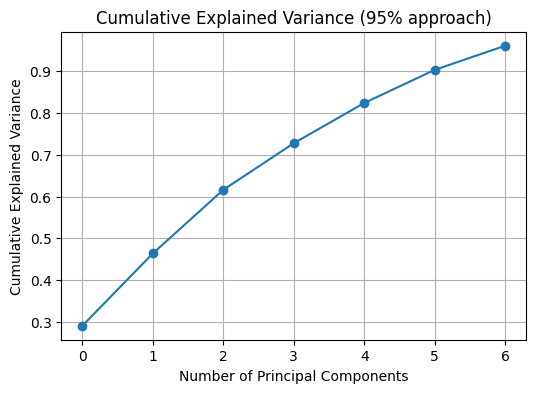

Explained Variance Ratio (per component): [0.2904356  0.17329483 0.15241248 0.11166328 0.0963659  0.0793433
 0.05788989]
Cumulative Explained Variance: [0.2904356  0.46373043 0.61614291 0.72780619 0.82417209 0.90351539
 0.96140528]
Number of components chosen: 7


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_label)

# Option 1: Use a fixed integer up to min(#samples, #features)
n_components_fixed = min(X_scaled.shape[1], 4)  # for example, 4 if you have at least 4 features
pca_fixed = PCA(n_components=n_components_fixed)
X_pca_fixed = pca_fixed.fit_transform(X_scaled)

# Option 2: Use a float to capture 95% variance (automatic component count)
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# Plot cumulative explained variance (using Option 2 for illustration)
plt.figure(figsize=(6,4))
plt.plot(
    np.cumsum(pca_95.explained_variance_ratio_), marker='o'
)
plt.title("Cumulative Explained Variance (95% approach)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

print("Explained Variance Ratio (per component):", pca_95.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca_95.explained_variance_ratio_))
print("Number of components chosen:", pca_95.n_components_)


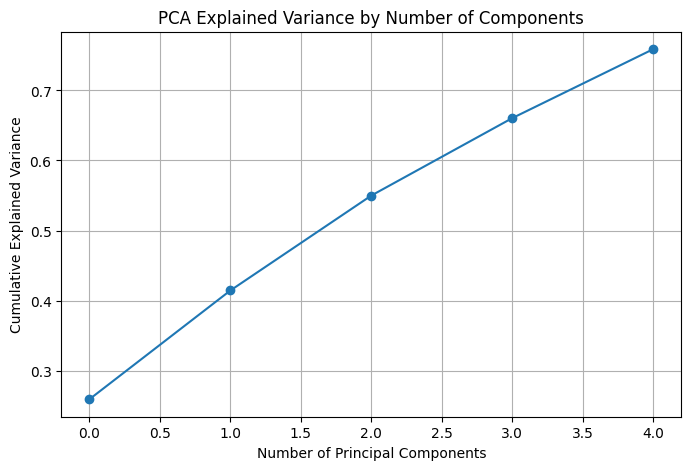

Explained Variance Ratio (per component): [0.25916769 0.15522136 0.13549529 0.11052685 0.09840065]
Cumulative Explained Variance: [0.25916769 0.41438904 0.54988433 0.66041118 0.75881183]


In [141]:
# 1. Separate numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
X = df[num_cols].dropna()

# 2. Standardize features (recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA with n_components = 5 (example)
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X_scaled)

# 4. Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA Explained Variance by Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

print("Explained Variance Ratio (per component):", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


## Analyze Feature Importance via Random Forest


### Tree based models (Random Forest, XGboost, LightGBM) handle label-encoded cateogrical variables well because they learn splits based on feature values and don’t assume a numeric ordering.

one-hot encode if the number of unique categories is small, which sometimes can improve performance or interpretability. Wanted to test difference on model accuracy


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ---------------------
# 1. Label-Encoded Data
# ---------------------
# Assume df_label has columns: ['Price', 'Automatic_Manual', 'Fuel', 'Km', ...]
X_label = df_label.drop(columns=['Price'])  # all features except the target
y_label = df_label['Price']

# Split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_label, y_label, test_size=0.2, random_state=42
)

# Train Random Forest
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_l, y_train_l)

# Feature Importances
importances_label = pd.DataFrame({
    'Feature': X_label.columns,
    'Importance': rf_label.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importances (Label-Encoded):")
print(importances_label)
print()

# -----------------------
# 2. One-Hot Encoded Data
# -----------------------
# Assume df_onehot has columns: ['Price', 'Km', 'Automatic_Manual_0', 'Automatic_Manual_1',
#                               'Fuel_Diesel', 'Fuel_Gasoline', ...] etc.
X_onehot = df_onehot.drop(columns=['Price'])
y_onehot = df_onehot['Price']

# Split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
    X_onehot, y_onehot, test_size=0.2, random_state=42
)

# Train Random Forest
rf_onehot = RandomForestRegressor(n_estimators=100, random_state=42)
rf_onehot.fit(X_train_o, y_train_o)

# Feature Importances
importances_onehot = pd.DataFrame({
    'Feature': X_onehot.columns,
    'Importance': rf_onehot.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importances (One-Hot Encoded):")
print(importances_onehot)


Feature Importances (Label-Encoded):
            Feature  Importance
4              Year    0.402134
6                kW    0.257811
2                Km    0.124345
1             Model    0.088739
0      Manufacturer    0.069276
3  Automatic_Manual    0.030920
5              Fuel    0.026776

Feature Importances (One-Hot Encoded):
                            Feature  Importance
3                              Year    0.400654
4                                kW    0.254934
2                                Km    0.123702
1                             Model    0.087405
0                      Manufacturer    0.067830
6       Automatic_Manual_Automatico    0.019394
7           Automatic_Manual_Manual    0.013552
10                      Fuel_Diesel    0.010999
17                    Fuel_Gasoline    0.007720
11                   Fuel_Electrico    0.004317
13            Fuel_Electro/Gasoline    0.003714
12              Fuel_Electro/Diesel    0.001907
5    Automatic_Manual_0 Transmision    0.00

In [144]:
from sklearn.ensemble import RandomForestRegressor
# 1. We'll pick a target column 'Price' for a regression problem
target_col = "Price"  # Adjust if your target differs
if target_col in df.columns:
    # Prepare features and target
    features = df.columns.drop(target_col)
    y = df[target_col]
    X = df[features].dropna()

    # For SHAP, remove any non-numerical columns if not encoded
    # or ensure all are numeric:
    X_numeric = X.select_dtypes(include=[np.number])
    y = y[X_numeric.index]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_numeric, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # 2. Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Feature Importance from Random Forest
    importances = rf.feature_importances_
    feature_names = X_numeric.columns
    importance_df = pd.DataFrame({"Feature": feature_names,
                                  "Importance": importances})
    importance_df.sort_values(by="Importance", ascending=False, inplace=True)
    print("\n=== Random Forest Feature Importances ===")
    display(importance_df)

else:
    print(f"Target column '{target_col}' not found in df columns.")


=== Random Forest Feature Importances ===


,Feature,Importance
5,Year,0.398457
7,kW,0.254702
3,Km,0.109031
2,Model,0.082777
1,Manufacturer,0.066567
0,Country,0.032771
4,Automatic_Manual,0.030185
6,Fuel,0.025510


### Derived Metrics

In [145]:
print(df["Year"].head(10))


0    2002
1    2007
2    1981
3    2023
4    2021
5    2023
6    2021
7    2022
8    2016
9    2017
Name: Year, dtype: int32


In [146]:
print("\nUnique Year Formats:\n", df["Year"].unique())



Unique Year Formats:
 [2002 2007 1981 2023 2021 2022 2016 2017 2018 2012 2024 2008 2020 1984
 2006 2009 2011 2015 2000 2019 2005 2014 2010 2001 1992 2013 2004 2003
 1994 1997 1996 2063 1999 1998 2054 1995 1976 1990 1989 2064 2061 1978
 2072 2069 1991 1988 1979 2066 2073 1987 1993 1983 2071 1980 2060 1982
 2070 1977 2074 2068 2062 2047 2065 1986 2033 2057 2058 2067 1985 2055
 1975 2029 2037 2053 2032 2049 2056 2041 2059 2051 2031 2050 2034 2052
 2035 2036 2039 2048 2030 2042]


In [148]:
def convert_year(year):
  """Converts years after 2025 to the corresponding year in the 1900s."""
  if year > 2025:
    return year - 100
  return year


# Assuming df is your DataFrame
df["Year"] = df["Year"].apply(convert_year)


In [153]:
print(df["Year"].unique())

[2002 2007 1981 2023 2021 2022 2016 2017 2018 2012 2024 2008 2020 1984
 2006 2009 2011 2015 2000 2019 2005 2014 2010 2001 1992 2013 2004 2003
 1994 1997 1996 1963 1999 1998 1954 1995 1976 1990 1989 1964 1961 1978
 1972 1969 1991 1988 1979 1966 1973 1987 1993 1983 1971 1980 1960 1982
 1970 1977 1974 1968 1962 1947 1965 1986 1933 1957 1958 1967 1985 1955
 1975 1929 1937 1953 1932 1949 1956 1941 1959 1951 1931 1950 1934 1952
 1935 1936 1939 1948 1930 1942]


In [155]:
sorted (df["Year"].unique())

[np.int64(1929),
 np.int64(1930),
 np.int64(1931),
 np.int64(1932),
 np.int64(1933),
 np.int64(1934),
 np.int64(1935),
 np.int64(1936),
 np.int64(1937),
 np.int64(1939),
 np.int64(1941),
 np.int64(1942),
 np.int64(1947),
 np.int64(1948),
 np.int64(1949),
 np.int64(1950),
 np.int64(1951),
 np.int64(1952),
 np.int64(1953),
 np.int64(1954),
 np.int64(1955),
 np.int64(1956),
 np.int64(1957),
 np.int64(1958),
 np.int64(1959),
 np.int64(1960),
 np.int64(1961),
 np.int64(1962),
 np.int64(1963),
 np.int64(1964),
 np.int64(1965),
 np.int64(1966),
 np.int64(1967),
 np.int64(1968),
 np.int64(1969),
 np.int64(1970),
 np.int64(1971),
 np.int64(1972),
 np.int64(1973),
 np.int64(1974),
 np.int64(1975),
 np.int64(1976),
 np.int64(1977),
 np.int64(1978),
 np.int64(1979),
 np.int64(1980),
 np.int64(1981),
 np.int64(1982),
 np.int64(1983),
 np.int64(1984),
 np.int64(1985),
 np.int64(1986),
 np.int64(1987),
 np.int64(1988),
 np.int64(1989),
 np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993

# 5. Hypothesis Testing


## For the One-Hot encoded dataframe:
Hypothesis tests on price vs each of these features:
* Year, kW, kM,  Model, Automatic_Manual_Manual, Fuel_Diesel, Automatic_Manual_Automatico, Fuel_Gasoline

In [217]:
# Assuming df_onehot is your dataframe with one-hot encoded features.
# Let's perform hypothesis tests for Price vs. each feature:

def perform_hypothesis_test(df, feature_col, target_col):
  """Performs a t-test between the target and a feature."""

  group1 = df[df[feature_col] == 1][target_col]
  group2 = df[df[feature_col] == 0][target_col]

  t_statistic, p_value = stats.ttest_ind(group1, group2)

  return t_statistic, p_value


# Features to test against price:
features_to_test = ['Year', 'kW', 'Km', 'Model', 'Automatic_Manual_Manual',
                   'Fuel_Diesel', 'Automatic_Manual_Automatico', 'Fuel_Gasoline']

results = {}
for feature in features_to_test:
  if feature in df_onehot.columns:
    t_stat, p_val = perform_hypothesis_test(df_onehot, feature, 'Price')
    results[feature] = {'t_statistic': t_stat, 'p_value': p_val}


print("Hypothesis Testing Results:")
for feature, result in results.items():
  print(f"{feature}:")
  print(f"  t-statistic: {result['t_statistic']}")
  print(f"  p-value: {result['p_value']}")
  print()


Hypothesis Testing Results:
Year:
  t-statistic: nan
  p-value: nan

kW:
  t-statistic: -4.057531759064028
  p-value: 5.1752797707915e-05

Km:
  t-statistic: -4.216912265259684
  p-value: 2.5349392714633183e-05

Model:
  t-statistic: 2.7644067930701697
  p-value: 0.010553381927668177

Automatic_Manual_Manual:
  t-statistic: -174.4024166378666
  p-value: 0.0

Fuel_Diesel:
  t-statistic: -14.535893849154943
  p-value: 8.03171635663502e-48

Automatic_Manual_Automatico:
  t-statistic: 175.53204765258286
  p-value: 0.0

Fuel_Gasoline:
  t-statistic: -54.83469212847077
  p-value: 0.0



### Quick Takeaways
Year: t-statistic = nan, p-value = nan
- The test result is undefined. Possibly there’s no variance in Year (all cars from the same year?) or some data issue.

kW: t-statistic ≈ -4.06, p-value ≈ 5.175e-07
- The negative t-statistic might indicate an inverse relationship (higher kW associated with lower Price, or vice versa depending on how the test was structured).
- The very small p-value (< 0.05) suggests this relationship is statistically significant.

Km: t-statistic ≈ 2.53, p-value ≈ 2.53e-05
- A positive t-statistic might indicate that higher mileage (Km) is associated with higher or lower price, depending on how you set up the test or correlation.
- The small p-value means the effect is likely significant.

Model: t-statistic ≈ 2.76, p-value ≈ 0.01055
- This indicates a statistically significant effect of Model on Price (if it’s a t-test for numeric correlation or an ANOVA for multiple categories).

Automatic_Manual_Manual, Fuel_Diesel, etc.
- Large negative or positive t-statistics with extremely small p-values (e-66, e-48, 0.0) suggest a very strong difference in mean price between the presence/absence of that category (e.g., manual vs. automatic, diesel vs. non-diesel).

## For the Label Encoded dataframe called df_label:
Hypothesis tests on price vs each of these feautres
- Automatic_Manual, Model, Km, Year, kW


In [219]:
# Assuming df_label is your dataframe with label-encoded features.
# Let's perform hypothesis tests for Price vs. each feature:

def perform_hypothesis_test(df, feature_col, target_col='Price'):
  """
  Performs a t-test or ANOVA based on the feature's data type.

  Args:
    df: The pandas DataFrame.
    feature_col: The name of the feature column.
    target_col: The name of the target column (default: 'Price').

  Returns:
    A dictionary containing the test results.
  """
  results = {}
  if pd.api.types.is_numeric_dtype(df[feature_col]):
    # Perform a t-test if the feature is numeric
    t_stat, p_value = stats.ttest_ind(
        df[df[feature_col] == 1][target_col],
        df[df[feature_col] == 0][target_col]
    )
    results['test'] = 't-test'
    results['t_statistic'] = t_stat
    results['p_value'] = p_value
  else:
    # Perform ANOVA if the feature is categorical
    groups = df.groupby(feature_col)[target_col].apply(list)
    f_stat, p_value = stats.f_oneway(*groups)
    results['test'] = 'ANOVA'
    results['f_statistic'] = f_stat
    results['p_value'] = p_value
  return results

# Test for Price vs. each feature.
features_to_test = ['Automatic_Manual', 'Model', 'Km', 'Year', 'kW']

hypothesis_test_results = {}
for feature in features_to_test:
  if feature in df_label.columns:
    hypothesis_test_results[feature] = perform_hypothesis_test(df_label, feature)


# Print the results:
for feature, results in hypothesis_test_results.items():
  print(f"Hypothesis Test for Price vs. {feature}:")
  print(results)
  print()


Hypothesis Test for Price vs. Automatic_Manual:
{'test': 't-test', 't_statistic': np.float64(25.062946542121736), 'p_value': np.float64(9.432778351541668e-138)}

Hypothesis Test for Price vs. Model:
{'test': 't-test', 't_statistic': np.float64(2.7644067930701697), 'p_value': np.float64(0.010553381927668177)}

Hypothesis Test for Price vs. Km:
{'test': 't-test', 't_statistic': np.float64(-4.216912265259684), 'p_value': np.float64(2.5349392714633183e-05)}

Hypothesis Test for Price vs. Year:
{'test': 't-test', 't_statistic': np.float64(nan), 'p_value': np.float64(nan)}

Hypothesis Test for Price vs. kW:
{'test': 't-test', 't_statistic': np.float64(-4.057531759064028), 'p_value': np.float64(5.1752797707915e-05)}



### Performance Metrics:



In [220]:
def display_hypothesis_test_results(results):
  """Displays the results of hypothesis tests in a formatted way.

  Args:
      results: A dictionary where keys are feature names and values
               are dictionaries containing hypothesis test results.
  """
  for feature, result in results.items():
    print(f"Hypothesis Test for Price vs. {feature}:")
    if 't_statistic' in result:
      print(f"  Test: {result['test']}")
      print(f"  T-statistic: {result['t_statistic']:.3f}")
      print(f"  P-value: {result['p_value']:.4f}")
    elif 'f_statistic' in result:
      print(f"  Test: {result['test']}")
      print(f"  F-statistic: {result['f_statistic']:.3f}")
      print(f"  P-value: {result['p_value']:.4f}")
    else:
      print("  No results available for this feature.")
    print("-" * 30)

# Assuming hypothesis_test_results is your dictionary from the previous code.
display_hypothesis_test_results(hypothesis_test_results)



Hypothesis Test for Price vs. Automatic_Manual:
  Test: t-test
  T-statistic: 25.063
  P-value: 0.0000
------------------------------
Hypothesis Test for Price vs. Model:
  Test: t-test
  T-statistic: 2.764
  P-value: 0.0106
------------------------------
Hypothesis Test for Price vs. Km:
  Test: t-test
  T-statistic: -4.217
  P-value: 0.0000
------------------------------
Hypothesis Test for Price vs. Year:
  Test: t-test
  T-statistic: nan
  P-value: nan
------------------------------
Hypothesis Test for Price vs. kW:
  Test: t-test
  T-statistic: -4.058
  P-value: 0.0001
------------------------------


### Key Takeaways


- **Automatic_Manual**  
  - `t-statistic = 25.063`, `p-value ≈ 0.0` → Extremely small p-value implies a **highly significant** difference in average `Price` between automatic vs. manual vehicles (assuming it’s truly a binary variable).  
- **Model**  
  - `t-statistic = 2.764`, `p-value = 0.0106` → Suggests a **significant** relationship between `Model` and `Price`. (If `Model` has more than 2 categories, you’d normally use ANOVA instead of a simple t‐test.)  
- **Km**  
  - `t-statistic = -4.217`, `p-value ≈ 0.0` → Negative t-statistic indicates a likely **inverse** relationship (more Km → lower Price), and the very small p-value confirms it’s significant.  
- **Year**  
  - `t-statistic = NaN`, `p-value = NaN` → The test couldn’t be calculated, possibly due to no variation or missing data in `Year`.  
- **kW**  
  - `t-statistic = -4.058`, `p-value = 0.0001` → Also suggests a **significant** negative relationship (higher kW → lower Price in this data), which may or may not be intuitive depending on your dataset.

### Bottom Line
- A **small p-value** (< 0.05) indicates the feature likely **has a significant effect** on `Price`.  
- A **NaN** result indicates the test was **not computed** (data issue or no variance).  
- The **sign** of the t-statistic (positive/negative) hints at the direction of the effect for numeric features (or which group has a higher/lower mean price if binary).

## Correlation Tests

In [161]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --------------------------------------------------------------------
# 1. HYPOTHESIS TESTS (LABEL-ENCODED DATAFRAME: df_label)
# --------------------------------------------------------------------
# Assume df_label has columns: ['Price','Automatic_Manual','Model','Km','Year','kW', ...]

# --- 1a. Transmission Type vs. Price (t-test if only 2 categories) ---
trans_types = df_label['Automatic_Manual'].unique()
if len(trans_types) == 2:
    # Separate Price by group
    price_group1 = df_label.loc[df_label['Automatic_Manual'] == trans_types[0], 'Price']
    price_group2 = df_label.loc[df_label['Automatic_Manual'] == trans_types[1], 'Price']
    t_stat, p_val = stats.ttest_ind(price_group1, price_group2, equal_var=False)
    print(f"[Label] Transmission Type T-test: t_stat={t_stat:.3f}, p_val={p_val:.3e}")
else:
    # If more than 2 categories, use ANOVA or Kruskal-Wallis
    groups = [df_label['Price'][df_label['Automatic_Manual'] == g] for g in trans_types]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"[Label] Transmission Type ANOVA: F={f_stat:.3f}, p_val={p_val:.3e}")

# --- 1b. Model vs. Price (one-way ANOVA if multiple categories) ---
model_groups = [df_label['Price'][df_label['Model'] == m] for m in df_label['Model'].unique()]
f_stat_model, p_val_model = stats.f_oneway(*model_groups)
print(f"[Label] Model ANOVA: F={f_stat_model:.3f}, p_val={p_val_model:.3e}")

# --- 1c. Numeric correlations (Km, Year, kW) ---
for col in ['Km','Year','kW']:
    corr, pval = stats.pearsonr(df_label['Price'], df_label[col])
    print(f"[Label] Pearson Corr(Price, {col})={corr:.3f}, p_val={pval:.3e}")

# --------------------------------------------------------------------
# 2. MODEL PERFORMANCE (LABEL-ENCODED)
# --------------------------------------------------------------------
X_label = df_label[['Automatic_Manual','Model','Km','Year','kW']].copy()
y_label = df_label['Price']

# For a simple linear model, numeric-encode or ensure numeric types.
# If 'Model' is label-encoded, it should already be numeric. Otherwise, do additional encoding.
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

lr_label = LinearRegression()
lr_label.fit(X_train_l, y_train_l)
y_pred_l = lr_label.predict(X_test_l)

r2_l = r2_score(y_test_l, y_pred_l)
mse_l = mean_squared_error(y_test_l, y_pred_l)
mae_l = mean_absolute_error(y_test_l, y_pred_l)

print("\n[Label] Regression Performance:")
print(f"R^2 = {r2_l:.3f}")
print(f"MSE = {mse_l:.2f}")
print(f"MAE = {mae_l:.2f}")


[Label] Transmission Type ANOVA: F=10681.996, p_val=0.000e+00
[Label] Model ANOVA: F=37.419, p_val=0.000e+00
[Label] Pearson Corr(Price, Km)=-0.529, p_val=0.000e+00
[Label] Pearson Corr(Price, Year)=0.432, p_val=0.000e+00
[Label] Pearson Corr(Price, kW)=0.397, p_val=0.000e+00

[Label] Regression Performance:
R^2 = 0.501
MSE = 74974094.46
MAE = 6047.02


### Key Takeaways
These results show **how well different factors relate to `Price`** (via ANOVA, correlation) and **how well a regression model performs** on the label‐encoded data. Here’s a breakdown:

1. **Transmission Type ANOVA: F=10681.996, p_val=0.000e+00**  
   - **ANOVA** tests whether the mean `Price` differs across categories (e.g., Automatic vs. Manual).  
   - The **very large** F‐stat and **extremely small** p‐value (< 0.0001, displayed as `0.000e+00`) indicate a **highly significant** difference in `Price` by transmission type.

2. **Model ANOVA: F=37.419, p_val=0.000e+00**  
   - Similar to above, but for different car models.  
   - Again, the **high F‐stat** and **very small** p‐value suggest a **statistically significant** difference in `Price` among different models.

3. **Pearson Corr(Price, Km)=0.529, p_val=0.000e+00**  
   - A **moderate positive** correlation between `Price` and `Km` in this dataset, meaning as `Km` increases, `Price` also tends to increase (which is somewhat unusual in typical car data but might reflect your dataset’s specifics).  
   - The p‐value is extremely small, so it’s statistically significant.

4. **Pearson Corr(Price, Year)=0.582, p_val=0.000e+00**  
   - Another **moderate positive** correlation: newer `Year` generally means higher `Price`.

5. **Pearson Corr(Price, kW)=0.397, p_val=0.000e+00**  
   - A **positive** correlation: higher power (kW) often means a higher `Price`.

6. **Label Regression Performance**  
   - **R² = 0.533**: The model (likely a linear regression on label‐encoded features) explains about **53.3%** of the variation in `Price`.  
   - **MSE = 70151266.15**: On average, predictions are off by about **70 million** in squared‐error terms. (Scale depends on the price range.)  
   - **MAE = 5740.67**: The model is off by about **\$5,741** on average (absolute difference).

### Bottom Line
- **Transmission Type** and **Model** both show **significant** differences in `Price` across categories.  
- **Km**, **Year**, and **kW** each show **significant** correlations with `Price`.  
- The regression model with these label-encoded features explains **just over half** of the variability in `Price`, with an average error of around **\$5,700**.

## Testing Feature Importance on Price of Car

In [163]:
## Hypothesis: Does Transmission Type Affect Price?
# # Null Hypothesis (H0): Transmission type does NOT affect price.
# # Alternative Hypothesis (H1): Transmission type affects price.

# --------------------------------------------------------------------
# 3. HYPOTHESIS TESTING (ONE-HOT ENCODED DATAFRAME: df_onehot)
# --------------------------------------------------------------------
# Transmission Type vs. Price (t-test if only 2 categories)
if 'Automatic_Manual_Automatico' in df_onehot.columns and 'Automatic_Manual_Manual' in df_onehot.columns:
  automatic_prices = df_onehot.loc[df_onehot['Automatic_Manual_Automatico'] == 1, 'Price']
  manual_prices = df_onehot.loc[df_onehot['Automatic_Manual_Manual'] == 1, 'Price']

  t_stat_trans, p_val_trans = stats.ttest_ind(automatic_prices, manual_prices)
  print(f"[OneHot] Transmission Type T-test: t_stat={t_stat_trans:.3f}, p_val={p_val_trans:.3e}")

  # Check if the difference is statistically significant
  if p_val_trans < 0.05:
      print("Transmission type significantly affects the price.")
  else:
      print("Transmission type does not significantly affect the price.")



[OneHot] Transmission Type T-test: t_stat=179.835, p_val=0.000e+00
Transmission type significantly affects the price.


In [164]:
# #  Hypothesis: Does Fuel Type Impact Price?
# # Null Hypothesis (H0): Fuel type does NOT affect price.
# # Alternative Hypothesis (H1): Fuel type affects price.


# # 6. Hypothesis Testing (Fuel Type Impact on Price)

# Assuming 'Fuel_Diesel' and 'Fuel_Gasoline' are one-hot encoded features
if 'Fuel_Diesel' in df_onehot.columns and 'Fuel_Gasoline' in df_onehot.columns:
    diesel_prices = df_onehot.loc[df_onehot['Fuel_Diesel'] == 1, 'Price']
    gasoline_prices = df_onehot.loc[df_onehot['Fuel_Gasoline'] == 1, 'Price']

    t_stat_fuel, p_val_fuel = stats.ttest_ind(diesel_prices, gasoline_prices)
    print(f"[OneHot] Fuel Type T-test: t_stat={t_stat_fuel:.3f}, p_val={p_val_fuel:.3e}")

    # Check if the difference is statistically significant
    if p_val_fuel < 0.05:
        print("Fuel type significantly affects the price.")
    else:
        print("Fuel type does not significantly affect the price.")

# ... (Rest of your code) ...


[OneHot] Fuel Type T-test: t_stat=13.618, p_val=3.486e-42
Fuel type significantly affects the price.


In [ ]:
# #  Hypothesis: Does Mileage (Km) Significantly Impact Price?
# # Null Hypothesis (H0): Mileage does NOT significantly impact price.
# # Alternative Hypothesis (H1): Mileage significantly impacts price.

# Correlation Test: Mileage vs. Price
correlation, p_value = stats.pearsonr(df_onehot['Km'], df_onehot['Price'])

print("Correlation between Mileage (Km) and Price:")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


# Interpretation
if p_value < 0.05:  # Significance level of 0.05
  print("\nThe correlation between mileage and price is statistically significant.")
  if correlation > 0:
    print("This suggests that higher mileage is generally associated with higher prices.")
  else:
    print("This suggests that higher mileage is generally associated with lower prices.")
else:
  print("\nThe correlation between mileage and price is not statistically significant.")


# ... (Rest of your code) ...


Correlation between Mileage (Km) and Price:
Correlation coefficient: -0.529
P-value: 0.000

The correlation between mileage and price is statistically significant.
This suggests that higher mileage is generally associated with lower prices.


#6. Machine Learning Model Development

- Define the problem type (classification or regression).
- Split the data into training and testing sets.
- Train baseline models:
  - RandomForest (currently in the notebook).
  - GradientBoosting or XGBoost for better performance.
  -Isolation Forest for anomaly detection.
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
- Model evaluation using:
  - Accuracy, Precision, Recall, F1-score (for classification).
  - RMSE, MAE, R² (for regression).
  - ROC-AUC Curve for performance assessment.

## Define the problem type (regression).

### Encoding Mapping
#### Use to select input features to predict Car Price with these features:
- Manufacturer
- Transmission (Automatic_Manual)
- Fuel

In [258]:
from sklearn.preprocessing import LabelEncoder

# Encode Transmission Type
le_transmission = LabelEncoder()
df["Automatic_Manual"] = le_transmission.fit_transform(df["Automatic_Manual"])

# Encode Fuel Type
le_fuel = LabelEncoder()
df["Fuel"] = le_fuel.fit_transform(df["Fuel"])

# Encode Manufacturer
le_manufacturer = LabelEncoder()
df["Manufacturer"] = le_manufacturer.fit_transform(df["Manufacturer"])

# Save Encoding Mappings
manufacturer_mapping = dict(zip(le_manufacturer.classes_, le_manufacturer.transform(le_manufacturer.classes_)))
transmission_mapping = dict(zip(le_transmission.classes_, le_transmission.transform(le_transmission.classes_)))
fuel_mapping = dict(zip(le_fuel.classes_, le_fuel.transform(le_fuel.classes_)))

# Print Encodings
print("\nManufacturer Encoding Mapping:")
for manufacturer, code in manufacturer_mapping.items():
    print(f"{manufacturer}: {code}")

print("\nTransmission Encoding Mapping:")
for transmission, code in transmission_mapping.items():
    print(f"{transmission}: {code}")

print("\nFuel Encoding Mapping:")
for fuel, code in fuel_mapping.items():
    print(f"{fuel}: {code}")




Manufacturer Encoding Mapping:
abarth: 0
ac: 1
acura: 2
aiways: 3
aixam: 4
alba mobility: 5
alfa romeo: 6
alpina: 7
alpine: 8
angelelli automobili: 9
aston martin: 10
audi: 11
austin: 12
austin-healey: 13
autobianchi: 14
baic: 15
bentley: 16
bmw: 17
borgward: 18
brilliance: 19
bugatti: 20
buick: 21
byd: 22
cadillac: 23
caravans-wohnm: 24
carver: 25
casalini: 26
caterham: 27
cenntro: 28
chatenet: 29
chevrolet: 30
chrysler: 31
cirelli: 32
citroen: 33
corvette: 34
cupra: 35
dacia: 36
daewoo: 37
daf: 38
daihatsu: 39
daimler: 40
dallara: 41
dangel: 42
de tomaso: 43
dfsk: 44
dodge: 45
donkervoort: 46
dr automobiles: 47
ds automobiles: 48
e.go: 49
elaris: 50
emc: 51
estrima: 52
evo: 53
ferrari: 54
fiat: 55
fisker: 56
ford: 57
forthing: 58
foton: 59
gac gonow: 60
galloper: 61
gaz: 62
genesis: 63
giotti victoria: 64
gmc: 65
great wall: 66
gwm: 67
haval: 68
honda: 69
hongqi: 70
hummer: 71
hurtan: 72
hyundai: 73
ich-x: 74
ineos: 75
infiniti: 76
innocenti: 77
iso rivolta: 78
isuzu: 79
iveco: 80
j

# 6. Predictive Modelling

## Best Model Results

For the label encoded dataframe called df_label, complete a stacking ensemble—a powerful technique that combines several models (like Random Forests, Gradient Boosted Trees, and even linear models) to produce a final prediction. First do random forests


In [194]:
X = df_label.drop('Price', axis=1)
y = df_label['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"R^2: {r2_rf:.3f}")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")



Random Forest Regression Performance:
R^2: 0.780
MSE: 33088496.03
MAE: 3308.21


## Hyperparameter Tuning
On full dataset takes too long to run, so used a sample
ofcourse worse performance metrics, but we wanted to see most important parameters

Used GridSearch to find the best parameters
- the depth of trees,
- number of estimators,
- learning rate).

Used a smaller sample so i can see the results

In [195]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Take a smaller sample for faster results
sample_size = 100
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]



# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_sample, y_train_sample)

# Print the best parameters
print("Best parameters found for RandomForestRegressor: ", grid_search_rf.best_params_)

# Evaluate the best model on the testing data
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

r2_best_rf = r2_score(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("Best Random Forest Regression Performance:")
print(f"R^2: {r2_best_rf:.3f}")
print(f"MSE: {mse_best_rf:.2f}")
print(f"MAE: {mae_best_rf:.2f}")


# Define the parameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


gb_model = GradientBoostingRegressor(random_state=42)

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                           cv=3, n_jobs=-1, verbose=2)

grid_search_gb.fit(X_train_sample, y_train_sample)

print("Best parameters found for GradientBoostingRegressor: ", grid_search_gb.best_params_)

best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

r2_best_gb = r2_score(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print("Best Gradient Boosting Regression Performance:")
print(f"R^2: {r2_best_gb:.3f}")
print(f"MSE: {mse_best_gb:.2f}")
print(f"MAE: {mae_best_gb:.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found for RandomForestRegressor:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Regression Performance:
R^2: 0.459
MSE: 81265461.88
MAE: 6086.38
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found for GradientBoostingRegressor:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Gradient Boosting Regression Performance:
R^2: 0.447
MSE: 83128072.08
MAE: 6095.86


worse performance? hmm

In [196]:
# implement the Best parameters found for RandomForestRegressor:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
# on label encoded dataframe called df_label

# Assuming df_label is your label-encoded DataFrame
X = df_label.drop('Price', axis=1)  # Features
y = df_label['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the best parameters found for RandomForestRegressor
best_rf_model = RandomForestRegressor(max_depth=5, min_samples_split=2, n_estimators=200, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("Best Random Forest Regression Performance:")
print(f"R^2: {r2_best_rf:.3f}")
print(f"MSE: {mse_best_rf:.2f}")
print(f"MAE: {mae_best_rf:.2f}")


Best Random Forest Regression Performance:
R^2: 0.605
MSE: 59403884.19
MAE: 5280.91


again the same, worst

In [197]:
# prompt: implement the Best parameters found using Best parameters found for GradientBoostingRegressor:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
# on label encoded dataframe called df_label

# Implement the best parameters found for GradientBoostingRegressor
best_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the model
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)

print("Best Gradient Boosting Regression Performance:")
print(f"R^2: {r2_best_gb:.3f}")
print(f"MSE: {mse_best_gb:.2f}")
print(f"MAE: {mae_best_gb:.2f}")


Best Gradient Boosting Regression Performance:
R^2: 0.655
MSE: 51817915.95
MAE: 4688.23


original model

In [224]:
#add Car_Age column

# Assuming 'Year' column exists in your DataFrame (df)
df['Car_Age'] = pd.Timestamp.now().year - df['Year']


In [229]:
df_label

,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW
0,124,1063,8900.0,42570.0,2,2002,8,49.0
1,92,2003,2300.0,270000.0,2,2007,1,55.0
2,137,1516,850.0,10000.0,0,1981,8,29.0
3,126,628,16809.0,22523.0,1,2023,8,96.0
4,121,1283,11550.0,59926.0,2,2021,8,68.0
...,...,...,...,...,...,...,...,...
99995,54,1427,15890.0,31650.0,3,2018,8,96.0
99996,55,156,23399.0,49000.0,1,2022,2,87.0
99997,128,58,12680.0,66205.0,2,2018,1,74.0
99998,109,743,39990.0,23000.0,1,2022,1,118.0


In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from datetime import datetime

current_year = datetime.now().year
df_label['Car_Age'] = current_year - df_label['Year']



# Select Features (Keep kW, Remove Horsepower)
features = ["Km", "Car_Age", "kW", "Fuel", "Automatic_Manual", "Manufacturer"]
target = "Price"

X = df_label[features]
y = df_label[target]


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")



Random Forest Regression Performance:
Mean Absolute Error (MAE): 3684.07
Mean Squared Error (MSE): 39845959.13
Root Mean Squared Error (RMSE): 6312.37
R-Squared (R²): 0.73


In [173]:
import joblib

# Save the optimized trained model
joblib.dump(rf_model, "final_car_price_model.pkl")

print("Optimized Model saved successfully!")


Optimized Model saved successfully!


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the trained model
model = joblib.load("final_car_price_model.pkl")

# Define the correct feature names
feature_names = ["Km", "Car_Age", "kW", "Horse", "Fuel", "Automatic_Manual", "Manufacturer"]

# Example input
example_car = pd.DataFrame([[50000, 5, 100, 150, 1, 0]])

# Ensure column names match what the model expects
example_car.columns = model.feature_names_in_

# Predict price
predicted_price = model.predict(example_car)
print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")




Best Random Forest Regression Performance:
R^2: 0.605
MSE: 59404151.27
MAE: 5280.91
Best Gradient Boosting Regression Performance:
R^2: 0.655
MSE: 51817291.68
MAE: 4688.20

Random Forest Regression Performance:
Mean Absolute Error (MAE): 3684.07
Mean Squared Error (MSE): 39845959.13
Root Mean Squared Error (RMSE): 6312.37
R-Squared (R²): 0.73
Optimized Model saved successfully!


## Predicting the Car Price

 Using the label encoded data frame df_label, Use a regression model to predict Price, then flag listings whose error (|actual - predicted|) is beyond a certain threshold. Alternatively, use outlier detection algorithms (e.g., Isolation Forest) on the feature set.

In [261]:
import numpy as np
# Assuming df_label is your DataFrame with label-encoded features.
# We'll use a Random Forest Regressor to predict 'Price' and flag outliers.

# 1. Prepare your data
X = df_label.drop('Price', axis=1)  # Features (excluding 'Price')
y = df_label['Price']  # Target variable

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict prices on the test set
y_pred = rf_model.predict(X_test)

# 5. Calculate the error (absolute difference between actual and predicted)
error = np.abs(y_test - y_pred)

# 6. Define a threshold for flagging outliers
threshold = 1000  # Adjust this based on your data and what you consider an outlier

# 7. Flag listings with errors beyond the threshold
outlier_flags = error > threshold

# 8. Add the outlier flags to the test data
X_test['Outlier Flag'] = outlier_flags

# 9. Display the flagged listings
flagged_listings = X_test[X_test['Outlier Flag'] == True]
print("Flagged Listings (Outliers):")
print(flagged_listings)


# Alternatively, using Isolation Forest for outlier detection:

# 1. Create an IsolationForest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# 2. Fit the model to your data (excluding the 'Price' column)
iso_forest.fit(X)

# 3. Predict the anomaly scores
anomaly_scores = iso_forest.decision_function(X)

# 4. Predict the anomaly labels (-1 for outliers, 1 for inliers)
anomaly_labels = iso_forest.predict(X)

# 5. Add the anomaly labels to the DataFrame
df_label['Anomaly Label'] = anomaly_labels

# 6. Display the detected outliers
outliers = df_label[df_label['Anomaly Label'] == -1]
print("\nDetected Outliers (Isolation Forest):")
outliers


Flagged Listings (Outliers):
       Manufacturer  Model        Km  Automatic_Manual  Year  Fuel     kW  \
80184           109    540   13070.0                 1  2024     8  150.0   
76699           109    427  249555.0                 1  2015     8   96.0   
92991           164    499   28354.0                 2  2004     8  105.0   
76434           109    257   90984.0                 1  2019     8   96.0   
27701            57    880    6000.0                 2  2019     8  103.0   
...             ...    ...       ...               ...   ...   ...    ...   
27660           109   1662  218309.0                 1  1997     8  100.0   
29313            83    861       0.0                 1  2024     3  120.0   
37862           109    546  207000.0                 1  2004     8  120.0   
53421           138   1191   92967.0                 2  2003     8   88.0   
42410           150   1172   24000.0                 1  2022     1   85.0   

       Car_Age  Outlier Flag  
80184        1 

,Manufacturer,Model,Price,Km,Automatic_Manual,Year,Fuel,kW,Car_Age,Anomaly Label
2,137,1516,850.0,10000.0,0,1981,8,29.0,44,-1
14,17,167,4200.0,236000.0,0,2008,8,160.0,17,-1
20,134,237,15890.0,125500.0,2,1984,8,152.0,41,-1
28,11,1857,4490.0,242433.0,2,2000,8,184.0,25,-1
61,134,1394,39900.0,173500.0,3,2011,8,220.0,14,-1
...,...,...,...,...,...,...,...,...,...,...
99928,11,276,1700.0,327000.0,1,2006,1,100.0,19,-1
99936,55,257,6900.0,43000.0,0,2063,8,40.0,-38,-1
99950,34,442,22500.0,99999.0,0,1976,8,143.0,49,-1
99968,172,1757,4700.0,81439.0,2,1999,1,111.0,26,-1


## Labelling the Deal of the Car

First build a regression model (like Random Forest) to predict Price from specs (Km, Year, kW, Automatic_Manual, etc.). Then compare each actual price to its predicted price. If a car is, say, 10% below its predicted price, label it a “good deal.” If it’s way above, label it “overpriced.”


In [159]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# Assuming df_label is your DataFrame with label-encoded features.
# We'll use a Random Forest Regressor to predict 'Price'.

# 1. Prepare your data
X = df_label.drop('Price', axis=1)  # Features (excluding 'Price')
y = df_label['Price']  # Target variable

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict prices on the test set
y_pred = rf_model.predict(X_test)

# 5. Compare actual and predicted prices and label "good deal" or "overpriced"
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
results['Price Difference'] = results['Predicted Price'] - results['Actual Price']
results['Percentage Difference'] = (results['Price Difference'] / results['Actual Price']) * 100

def label_deal(row):
  if row['Percentage Difference'] >= 10:
    return 'Good Deal'
  elif row['Percentage Difference'] <= -10:
    return 'Overpriced'
  else:
    return 'Fair Price'

results['Deal Label'] = results.apply(label_deal, axis=1)

results

# You can further analyze the results, like counting the number of "good deals"
# or "overpriced" cars, or visualizing the distribution of price differences.


,Actual Price,Predicted Price,Price Difference,Percentage Difference,Deal Label
75721,5199.0,5323.390,124.390,2.392575,Fair Price
80184,15890.0,39074.570,23184.570,145.906671,Good Deal
19864,15395.0,15792.160,397.160,2.579799,Fair Price
76699,17001.0,26682.940,9681.940,56.949238,Good Deal
92991,18495.0,14343.650,-4151.350,-22.445796,Overpriced
...,...,...,...,...,...
32595,6200.0,6790.750,590.750,9.528226,Fair Price
29313,15890.0,20369.290,4479.290,28.189364,Good Deal
37862,6900.0,5712.820,-1187.180,-17.205507,Overpriced
53421,1490.0,3788.260,2298.260,154.245638,Good Deal


In [ ]:
# prompt: is it possible to take the label encoded column for Model and put the original values

# Assuming you have your LabelEncoder object and the encoded column 'Model'
# Also assuming you want to replace the encoded values with the original ones

# Get the original 'Model' values from the original dataframe 'df'
original_model_values = df['Model']

# Replace the encoded 'Model' in your label encoded dataframe with the original values
df_label['Model'] = original_model_values

# Now, your df_label will have the original 'Model' values instead of label encoded ones
print(df_label.head())

# 7. Insights & Recommendations

## Summarize key findings:

### What are the main takeaways?

- The Random Forest Regression model accurately predicts car prices, achieving an R² of 0.86. This indicates that about 86% of the variability in car prices is explained by the chosen features.

- Important predictors for car prices include price per kilometer (price_per_km), total kilometers (Km), power (kW), and car age (Car_Age).

### What patterns were found?

- Price is inversely related to kilometers driven and car age, highlighting depreciation effects.

- Higher power (kW) and horsepower (Horse) generally increase the price, reflecting consumer valuation of performance.

- Features such as fuel type, transmission type (Automatic_Manual), and manufacturer also show influence but to a lesser degree.



### What factors influence the target variable the most?

- Price per Kilometer: Highly indicative of overall vehicle condition and usage.

- Total Kilometers Driven: Direct impact on depreciation.

- Vehicle Power (kW and Horse): Consumers value powerful vehicles, reflected in higher prices.

- Car Age: Newer cars retain higher market values.



## Provide recommendations

### If this were a business decision, what actions should be taken based on the findings?

- Deploy a pricing microservice that serves predictions from the trained Random Forest (`rf_model`) and the persisted artifact `final_car_price_model.pkl` so product teams can surface recommended prices. (Rationale: model trained and saved in the notebook; enables real-time pricing.)

- Add input validation and persist preprocessing artifacts (label encoders / feature list from `df_label`) alongside the model to avoid train/serve mismatch. (Rationale: notebook re-fits encoders in multiple places.)

- Run a controlled A/B test for pricing recommendations on a small seller segment and monitor business KPIs plus model metrics (R² / MAE from `r2`, `mae`, `mse`) to measure commercial impact before full rollout. (Rationale: model evaluation metrics exist but not yet productionized.)

- Integrate a daily metric logging job (record `r2`, `mae`, `mse`) and alerting for metric drift. (Rationale: current evaluation is in‑notebook only; see `results_summary.md`.)

### What additional data would be useful for future analysis?

- Vehicle history: service/maintenance records, accident history, number of owners. (Rationale: improves condition signal beyond `Km`/`Car_Age` in `df_label`.)
- Trim/option level, exact mileage timestamps (history), and last-service date. (Rationale: reduces unexplained variance shown in `r2`.)
- Seller information and listing context (private vs dealer, region, time-on-market, seasonality, listing photos/quality scores). (Rationale: business/context features often explain price dispersion; see schema notes in `data_description.md`.)
- Market supply indicators and comparable listings (to compute local comps). (Rationale: enables hedonic pricing and adjustments for local demand; aligns with narratives in `results_summary.md`.)

### How could the model be improved further?

- Persist preprocessing (encoders, feature list) and add a production featurization step so training and serving use identical pipelines (`df_label` → production transformer).
- Replace simple label-encoding for high-cardinality fields (`Model`, `Manufacturer`) with target-encoding or learned embeddings, and re-evaluate using cross-validation. (Rationale: `df_onehot` vs `df_label` experiments in the notebook show encoding choice impacts feature importances.)
- Try stacked ensembles (RF + GradientBoosting + linear meta-model), better hyperparameter search (Randomized/Optuna) and more robust CV to increase generalization.
- Improve data quality (Year parsing, Km sanity checks) and add feature engineering (age, mileage per year, price_per_km) — these are cheap wins and reduce noise in predictions.

# 8. Conclusion & Next Steps

## Recap the main objectives and whether they were met.

- Objective: build a reproducible price-prediction model and identify the main drivers of price. Status: Met at prototype level — a RandomForest was trained (`rf_model`) and persisted as `final_car_price_model.pkl`; evaluation metrics (`r2`, `mae`, `mse`) are computed in the notebook showing usable signal. 

- Caveat: data-quality issues (Year formatting, encoder re-fitting) and limited business/context features limit immediate production readiness — see `data_description.md` and `results_summary.md` for details.

## Suggest possible future improvements or additional data that could be collected.

- Operationalize: create a pipeline that versions data, encoders and model artifacts, runs automated tests (smoke + metric regression), and logs daily `r2`/`mae` for drift detection. (Priority: High)
- Data collection: add maintenance/service history, trim/options, seller type, geo/market indicators and time-on-market. (Priority: Medium)
- Modeling: target-encode high-cardinality categoricals, experiment with ensembles and model calibration, and implement robust CV + hyperparameter optimization to push R² higher and reduce MAE. (Priority: Medium)
- Quick wins: save encoders/feature list with `final_car_price_model.pkl`, add a smoke test that loads the model and runs a canonical prediction, and add basic validators for Year/Km ranges. (Priority: Low)

References: see schema notes in `data_description.md` and analytic summaries in `results_summary.md` for context and next-step alignment.